# ML Assignment 1/Project



Import All Libraries Here.

In [ ]:
## USING CUDA For Faster Training
# %load_ext cuml.accel

In [ ]:
# Import all Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, RidgeCV, ElasticNet, ElasticNetCV, BayesianRidge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.decomposition import PCA
from xgboost import XGBRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import LeaveOneOut, cross_val_score
import warnings
warnings.filterwarnings('ignore')

Import Dataset

In [ ]:
# Rename Dataset to ml_train, ml_test.csv
DATASET_TRAIN = pd.read_csv('ml_train.csv')
DATASET_TEST = pd.read_csv('ml_test.csv')

# Stage 1 - EDA

In [ ]:
DATASET_TRAIN.describe()
DATASET_TEST.describe()

,Supplier_Reliability,Equipment_Height,Equipment_Width,Equipment_Weight,Equipment_Value,Base_Transport_Fee
count,445.00000,477.000000,444.000000,4.480000e+02,500.000000,500.000000
mean,0.47209,22.262055,9.963964,3.222243e+05,806.476860,39.252340
std,0.26444,12.373074,5.676657,1.763496e+06,5250.850482,27.182379
min,0.01000,3.000000,2.000000,4.000000e+00,3.010000,10.030000
25%,0.25000,13.000000,6.000000,4.942500e+02,5.282500,17.207500
50%,0.45000,20.000000,8.000000,3.439500e+03,10.825000,24.520000
75%,0.69000,31.000000,13.000000,4.675525e+04,124.032500,62.240000
max,1.00000,64.000000,33.000000,2.516579e+07,83638.550000,99.450000


In [ ]:
print(DATASET_TRAIN.duplicated().any())
print(DATASET_TEST.duplicated().any())

False
False


In [ ]:
display(DATASET_TRAIN.head())
display(DATASET_TEST.head())
DATASET_TRAIN.info()
DATASET_TEST.info()

,Hospital_Id,Supplier_Name,Supplier_Reliability,Equipment_Height,Equipment_Width,Equipment_Weight,Equipment_Type,Equipment_Value,Base_Transport_Fee,CrossBorder_Shipping,Urgent_Shipping,Installation_Service,Transport_Method,Fragile_Equipment,Hospital_Info,Rural_Hospital,Order_Placed_Date,Delivery_Date,Hospital_Location,Transport_Cost
0,fffe3200360030003700,Jo Valencia,0.44,21.0,6.0,NaN,NaN,3.62,17.13,No,No,No,Roadways,No,Working Class,No,10/20/17,10/20/17,APO AA 33776,179.50
1,fffe3400380037003400,Wanda Warren,0.58,29.0,20.0,1210684.0,Marble,9703.37,35.42,No,Yes,Yes,Roadways,No,Working Class,No,02/22/16,02/24/16,"South Kevin, VT 84493",627732.45
2,fffe3200350036003700,Robert Ackies,0.97,39.0,15.0,3305.0,Aluminium,40.21,18.54,No,No,No,Roadways,No,Working Class,No,01/11/18,01/10/18,"Kevinshire, NE 31279",1565.92
3,fffe3800320034003400,Charlotte Membreno,0.70,8.0,5.0,606.0,Brass,4.55,17.48,No,No,No,Roadways,No,Working Class,No,08/06/16,08/06/16,DPO AP 61572,257.71
4,fffe3600340033003000,Nena Silva,0.66,27.0,13.0,NaN,Marble,2726.80,30.23,Yes,No,No,Roadways,No,Working Class,NaN,12/15/16,12/17/16,"Joshuamouth, AK 01550",8553.52


,Hospital_Id,Supplier_Name,Supplier_Reliability,Equipment_Height,Equipment_Width,Equipment_Weight,Equipment_Type,Equipment_Value,Base_Transport_Fee,CrossBorder_Shipping,Urgent_Shipping,Installation_Service,Transport_Method,Fragile_Equipment,Hospital_Info,Rural_Hospital,Order_Placed_Date,Delivery_Date,Hospital_Location
0,fffe33003400,Janie Callis,0.79,NaN,7.0,771.0,Clay,4.14,15.76,No,No,Yes,NaN,Yes,Wealthy,No,05/07/18,05/11/18,"North Kimberly, MI 38666"
1,fffe3700330036003600,Mike Hill,0.60,42.0,6.0,272.0,Wood,3.05,10.68,No,Yes,No,Airways,No,Working Class,No,12/31/18,12/27/18,"South Bobbytown, MA 63378"
2,fffe3300390038003400,Lois Byrnes,NaN,33.0,9.0,622763.0,Stone,304.78,79.61,No,No,Yes,Roadways,No,Working Class,No,07/07/15,07/11/15,"West Tammiechester, CT 85877"
3,fffe310030003900,Andrew Natividad,0.48,6.0,4.0,326.0,Brass,4.71,18.62,No,No,Yes,Roadways,No,Working Class,NaN,04/22/19,04/19/19,"West Brianside, SC 83606"
4,fffe3700330031003200,Cheryl Delong,0.58,30.0,10.0,10804.0,Bronze,26.01,41.76,No,Yes,Yes,Airways,No,Working Class,No,04/12/19,04/12/19,"Thomaschester, WY 99603"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Hospital_Id           5000 non-null   object 
 1   Supplier_Name         5000 non-null   object 
 2   Supplier_Reliability  4413 non-null   float64
 3   Equipment_Height      4717 non-null   float64
 4   Equipment_Width       4557 non-null   float64
 5   Equipment_Weight      4540 non-null   float64
 6   Equipment_Type        4401 non-null   object 
 7   Equipment_Value       5000 non-null   float64
 8   Base_Transport_Fee    5000 non-null   float64
 9   CrossBorder_Shipping  5000 non-null   object 
 10  Urgent_Shipping       5000 non-null   object 
 11  Installation_Service  5000 non-null   object 
 12  Transport_Method      3929 non-null   object 
 13  Fragile_Equipment     5000 non-null   object 
 14  Hospital_Info         5000 non-null   object 
 15  Rural_Hospital       

=== Percentile Values for Transport_Cost ===
 Percentile  Transport_Cost
          1      -5503.1567
          2      -1978.1374
          3       -964.5250
          4       -608.8216
          5       -432.1660
          6       -319.9122
          7       -248.3823
          8       -192.2468
          9       -157.5545
         10         97.4240
         11        112.5028
         12        122.2156
         13        129.8548
         14        136.2460
         15        143.4450
         16        147.7052
         17        152.0966
         18        157.0910
         19        162.3244
         20        167.7040
         21        171.5079
         22        175.6628
         23        179.2685
         24        183.3932
         25        188.4150
         26        192.1574
         27        197.5674
         28        203.2984
         29        208.8330
         30        213.5940
         31        219.2976
         32        224.1944
         33        229.7640
   

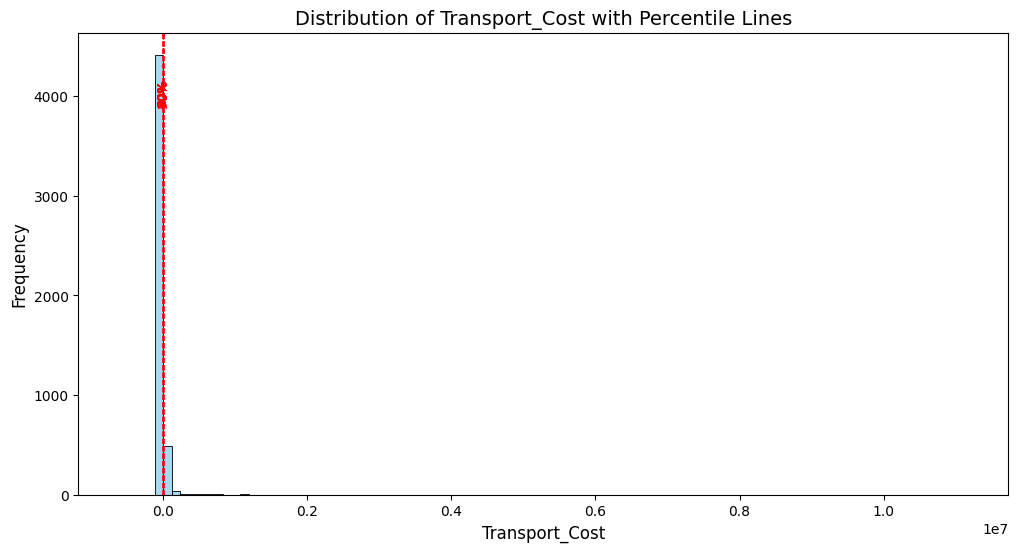

In [ ]:
# Get percentiles (10%, 20%, ..., 90%)
percentile_levels = list(range(1, 100))  # 10, 11, ..., 99
percentiles = np.percentile(DATASET_TRAIN["Transport_Cost"], percentile_levels)

# Create a DataFrame for display
percentile_df = pd.DataFrame({
    "Percentile": percentile_levels,
    "Transport_Cost": percentiles
})

# Display the percentile table
print("=== Percentile Values for Transport_Cost ===")
print(percentile_df.to_string(index=False))

# Define evenly spaced bins
bins = np.linspace(DATASET_TRAIN["Transport_Cost"].min(),
                   DATASET_TRAIN["Transport_Cost"].max(),
                   100)

# Plot histogram
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(DATASET_TRAIN["Transport_Cost"], bins=bins, ax=ax, color="skyblue", edgecolor="black")

# Add vertical percentile lines
for p, value in zip(np.arange(10, 100, 10), percentiles):
    ax.axvline(value, color='red', linestyle='--', linewidth=1)
    ax.text(value, ax.get_ylim()[1]*0.9, f'{p}%', rotation=90, color='red', ha='center', va='top', fontsize=9)

# Titles and labels
ax.set_title("Distribution of Transport_Cost with Percentile Lines", fontsize=14)
ax.set_xlabel("Transport_Cost", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)
plt.show()

Numerical columns in Training Dataset: ['Supplier_Reliability', 'Equipment_Height', 'Equipment_Width', 'Equipment_Weight', 'Equipment_Value', 'Base_Transport_Fee', 'Transport_Cost']
Numerical columns in Testing Dataset: ['Supplier_Reliability', 'Equipment_Height', 'Equipment_Width', 'Equipment_Weight', 'Equipment_Value', 'Base_Transport_Fee']


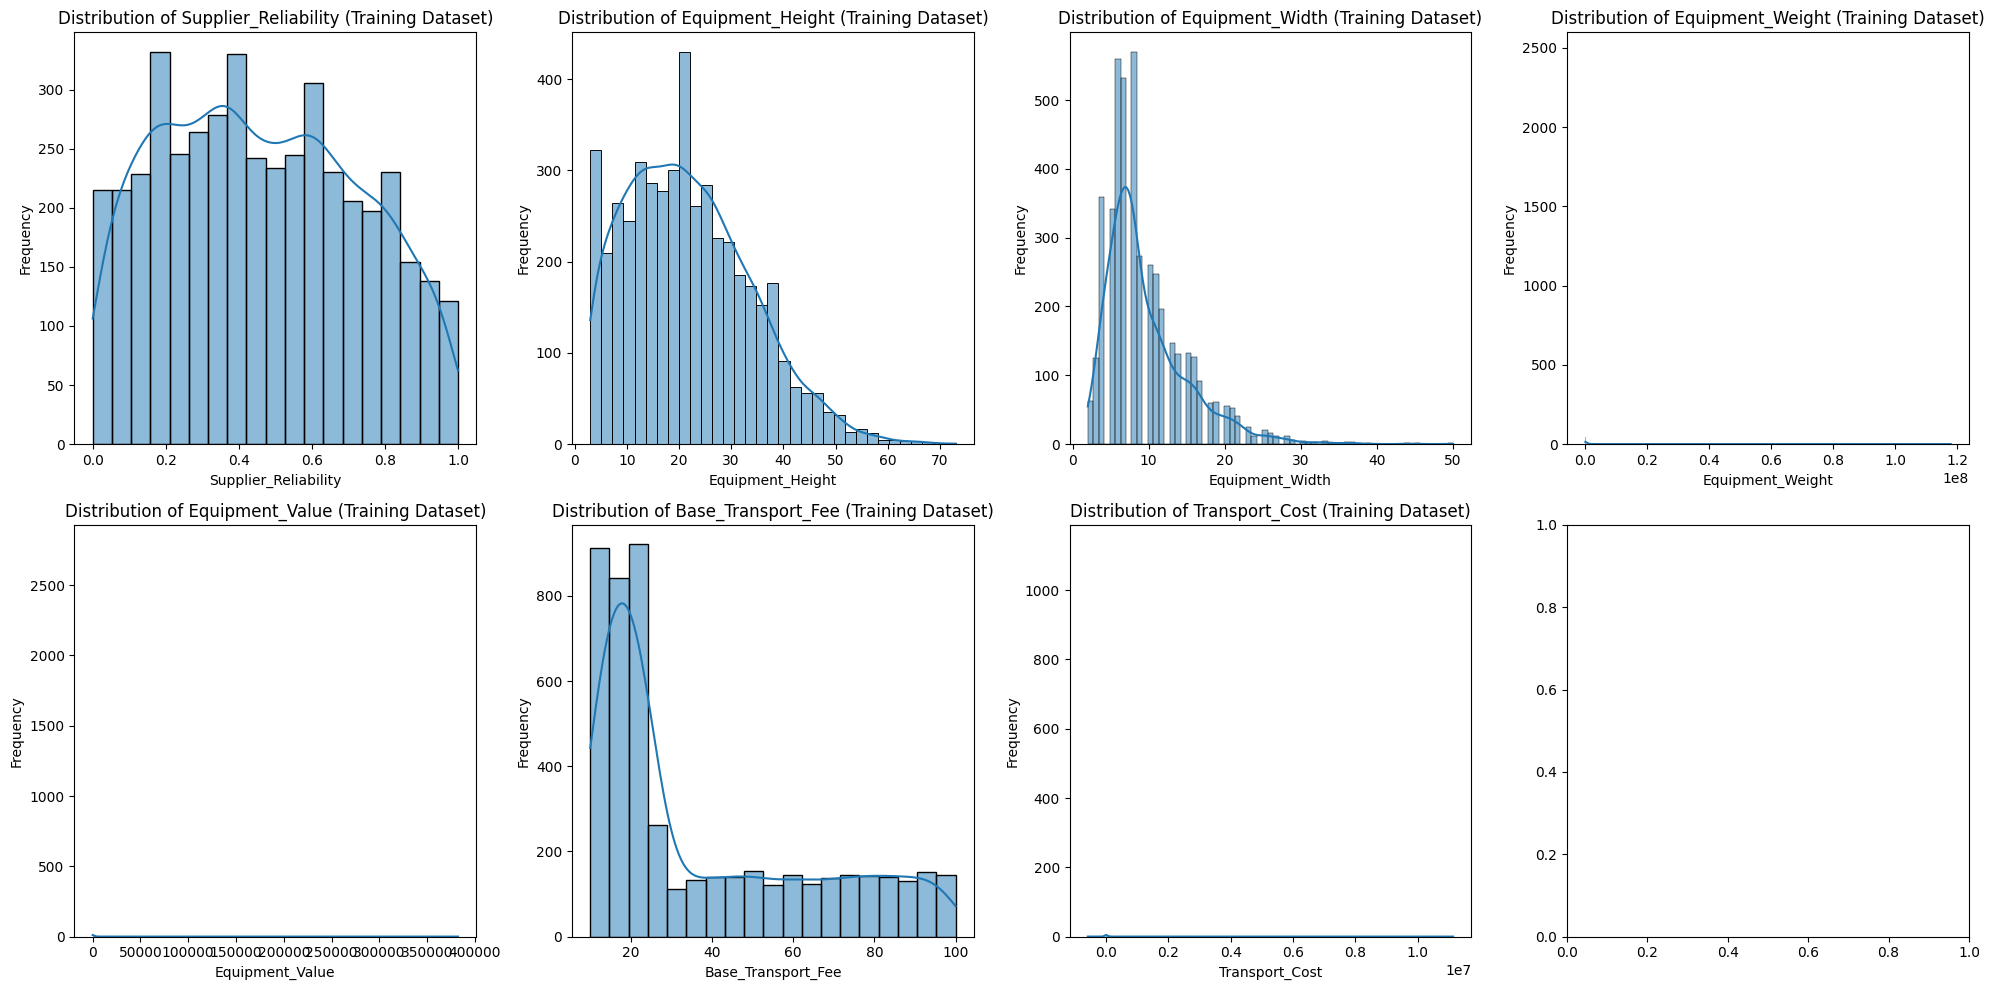

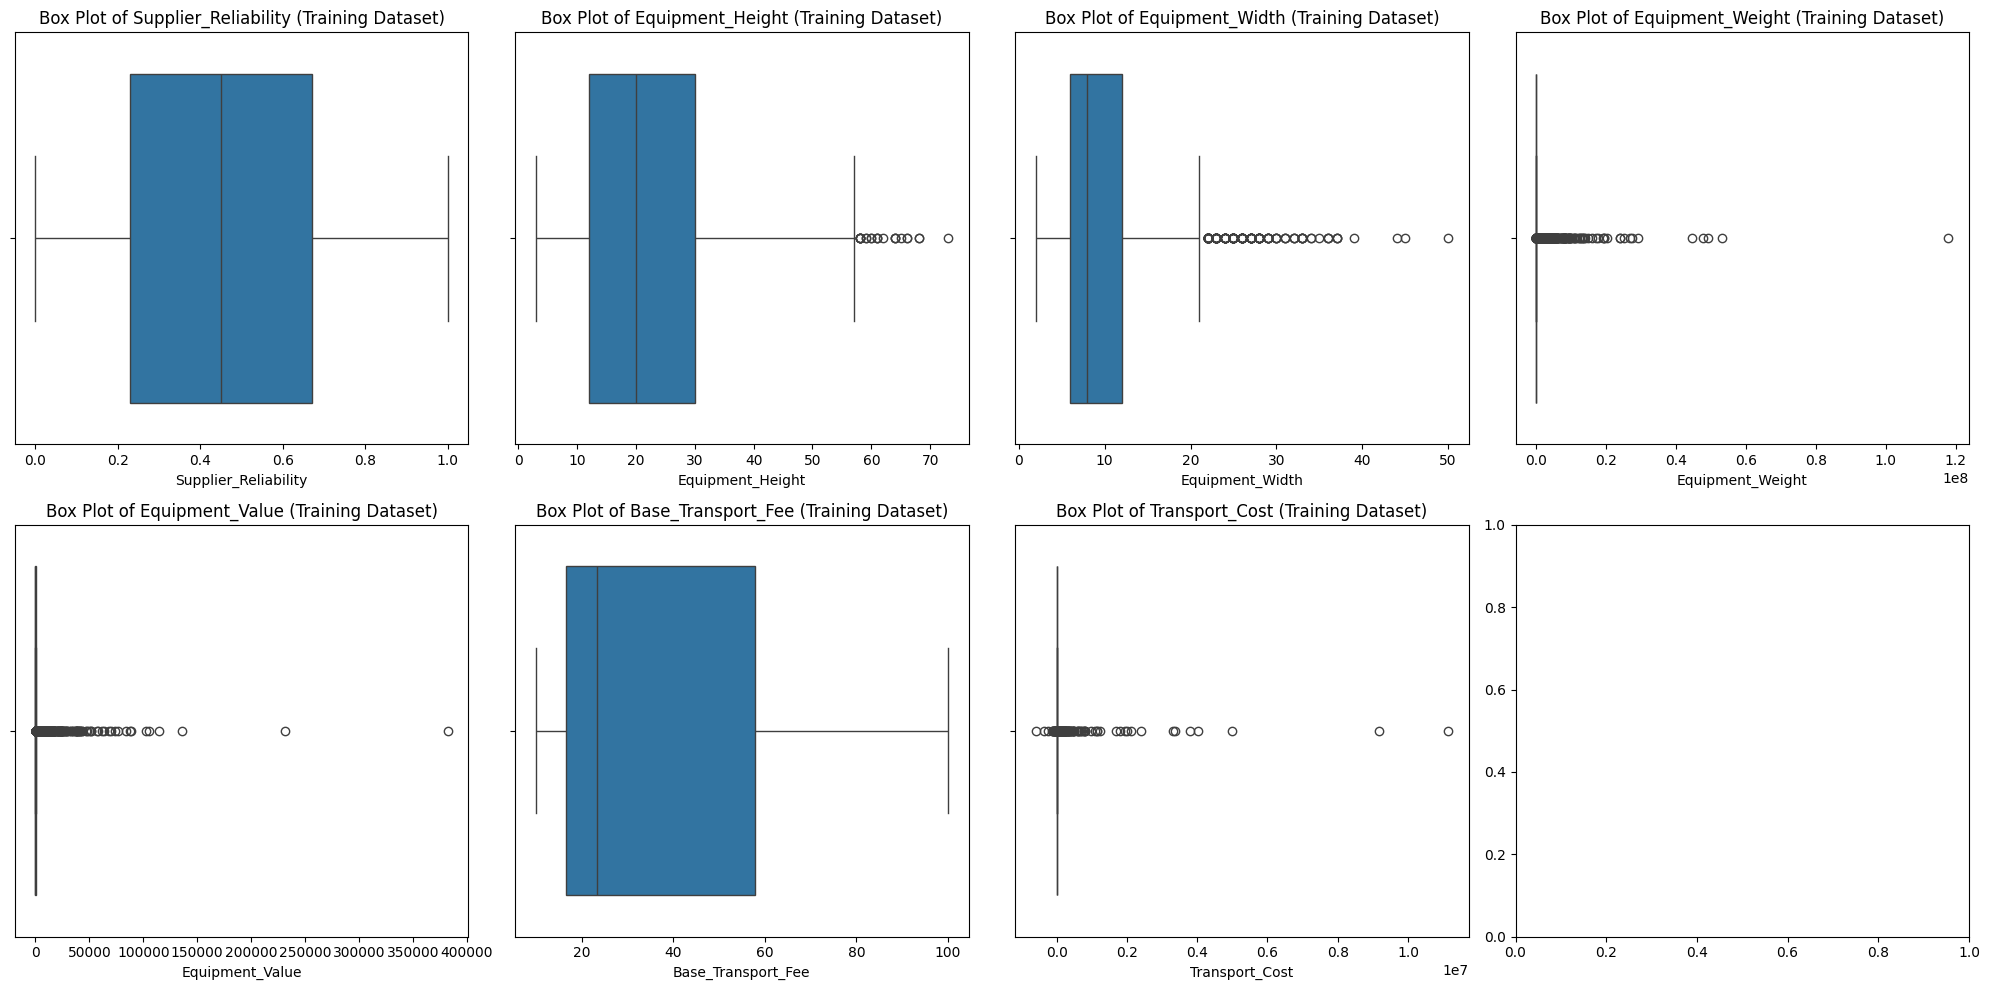

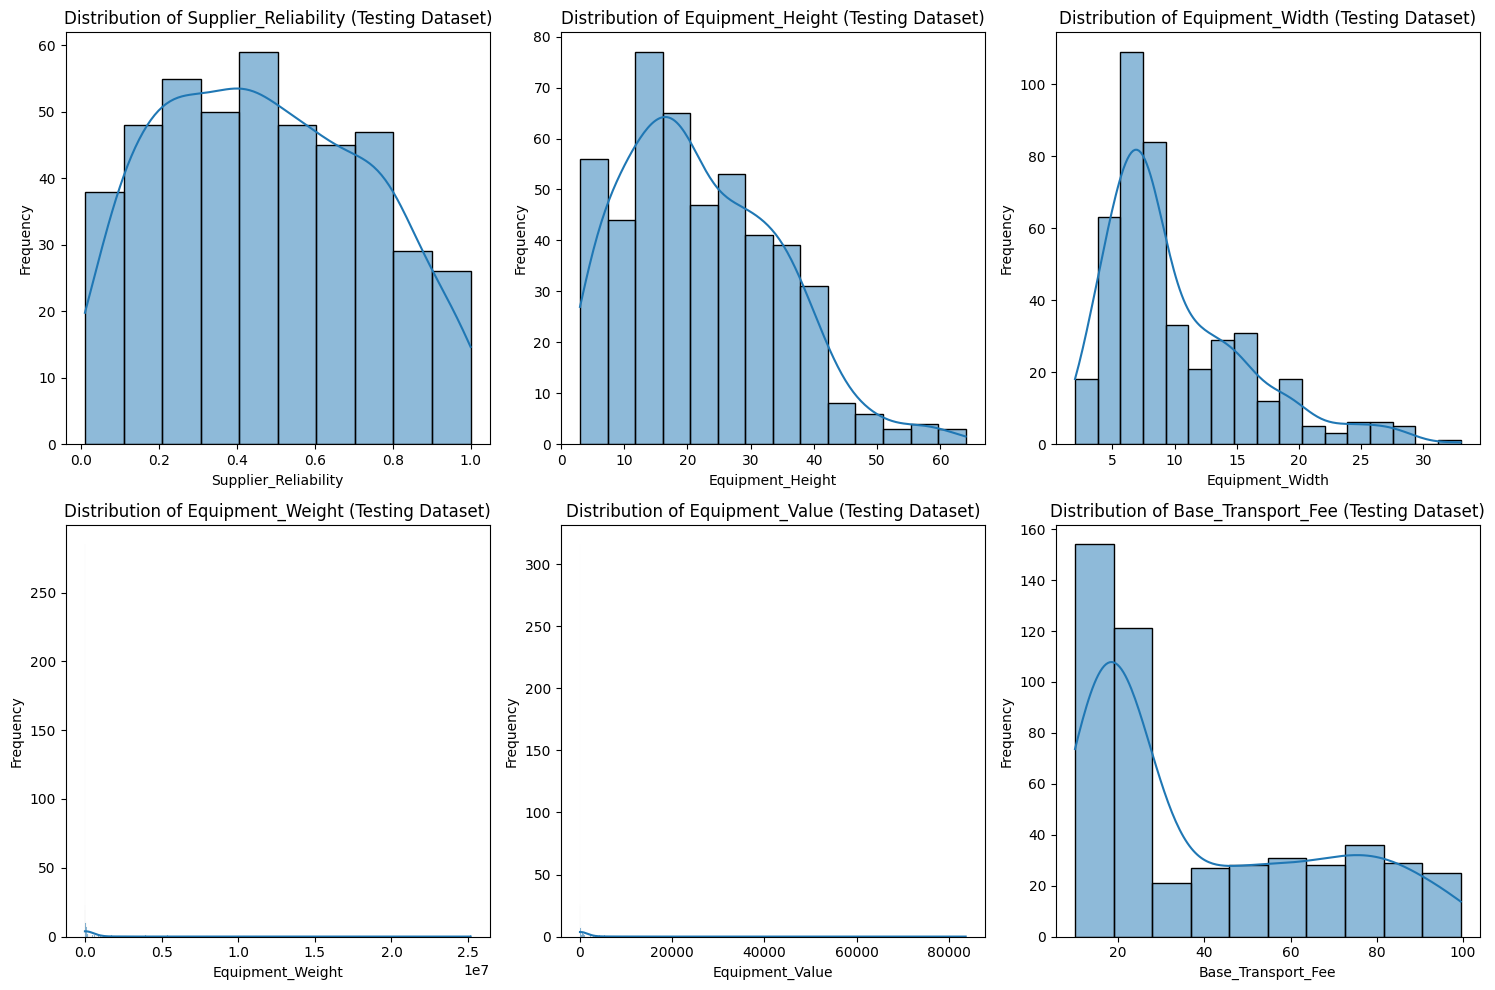

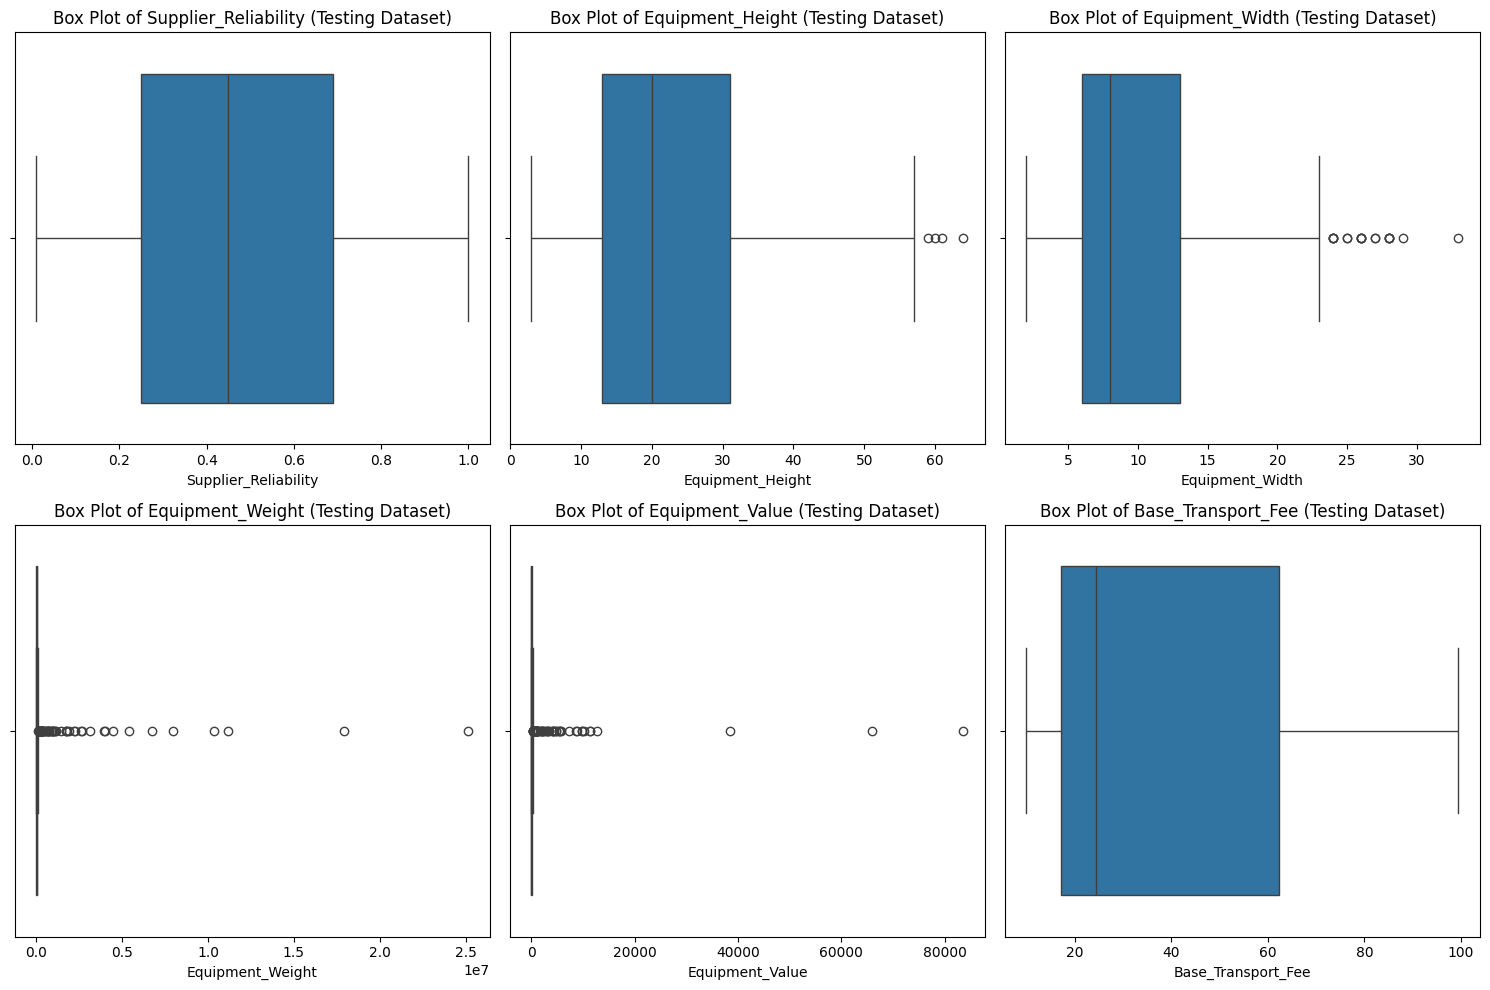

In [ ]:
numerical_cols_train = DATASET_TRAIN.select_dtypes(include=np.number).columns
numerical_cols_test = DATASET_TEST.select_dtypes(include=np.number).columns

print("Numerical columns in Training Dataset:", list(numerical_cols_train))
print("Numerical columns in Testing Dataset:", list(numerical_cols_test))

# Plotting for Training Dataset
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols_train):
    sns.histplot(DATASET_TRAIN[col].dropna(), kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col} (Training Dataset)')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols_train):
    sns.boxplot(x=DATASET_TRAIN[col].dropna(), ax=axes[i])
    axes[i].set_title(f'Box Plot of {col} (Training Dataset)')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()


# Plotting for Testing Dataset
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols_test):
    sns.histplot(DATASET_TEST[col].dropna(), kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col} (Testing Dataset)')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols_test):
    sns.boxplot(x=DATASET_TEST[col].dropna(), ax=axes[i])
    axes[i].set_title(f'Box Plot of {col} (Testing Dataset)')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

In [ ]:
def print_unique_categorical_counts(train_df, test_df):
    """Prints the number of unique entries for categorical variables in train and test datasets."""
    categorical_cols_train = train_df.select_dtypes(include=['object', 'category']).columns
    categorical_cols_test = test_df.select_dtypes(include=['object', 'category']).columns

    print("Unique entries in categorical columns (Training Dataset):")
    for col in categorical_cols_train:
        print(f"- {col}: {train_df[col].nunique()}")

    print("\nUnique entries in categorical columns (Testing Dataset):")
    for col in categorical_cols_test:
        print(f"- {col}: {test_df[col].nunique()}")
print_unique_categorical_counts(DATASET_TRAIN, DATASET_TEST)

Unique entries in categorical columns (Training Dataset):
- Hospital_Id: 5000
- Supplier_Name: 4966
- Equipment_Type: 7
- CrossBorder_Shipping: 2
- Urgent_Shipping: 2
- Installation_Service: 2
- Transport_Method: 3
- Fragile_Equipment: 2
- Hospital_Info: 2
- Rural_Hospital: 2
- Order_Placed_Date: 1606
- Delivery_Date: 1619
- Hospital_Location: 5000

Unique entries in categorical columns (Testing Dataset):
- Hospital_Id: 500
- Supplier_Name: 500
- Equipment_Type: 7
- CrossBorder_Shipping: 2
- Urgent_Shipping: 2
- Installation_Service: 2
- Transport_Method: 3
- Fragile_Equipment: 2
- Hospital_Info: 2
- Rural_Hospital: 2
- Order_Placed_Date: 445
- Delivery_Date: 427
- Hospital_Location: 500


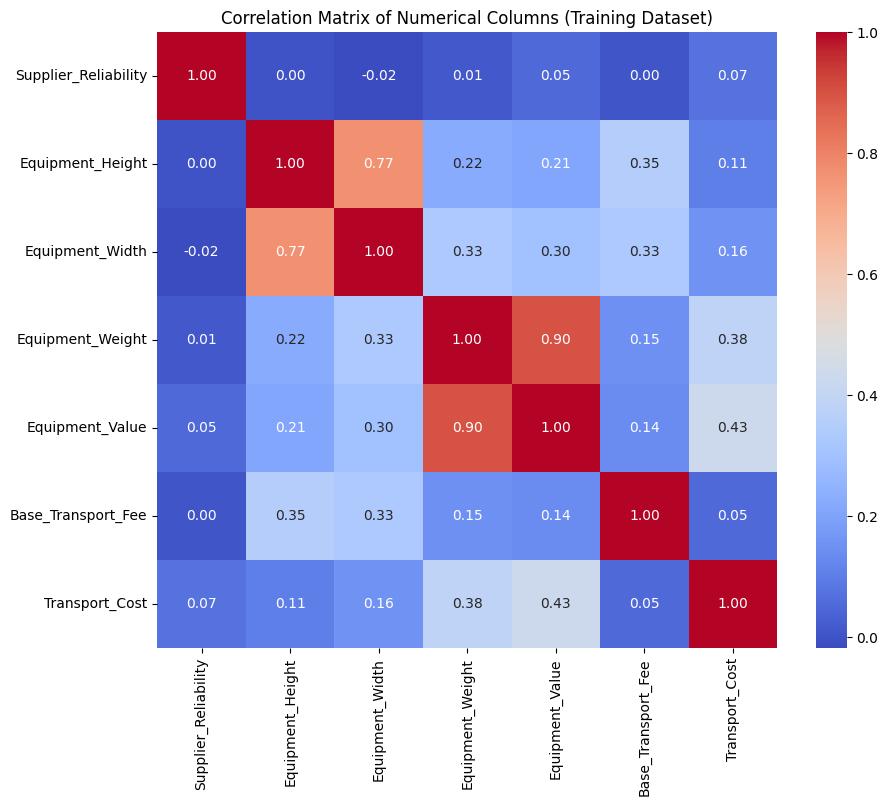

In [ ]:
correlation_matrix_train = DATASET_TRAIN[numerical_cols_train].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_train, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns (Training Dataset)')
plt.show()

Equipment Width and Height, and Equipment Weight and Value seems to have a strong correlation with each other.

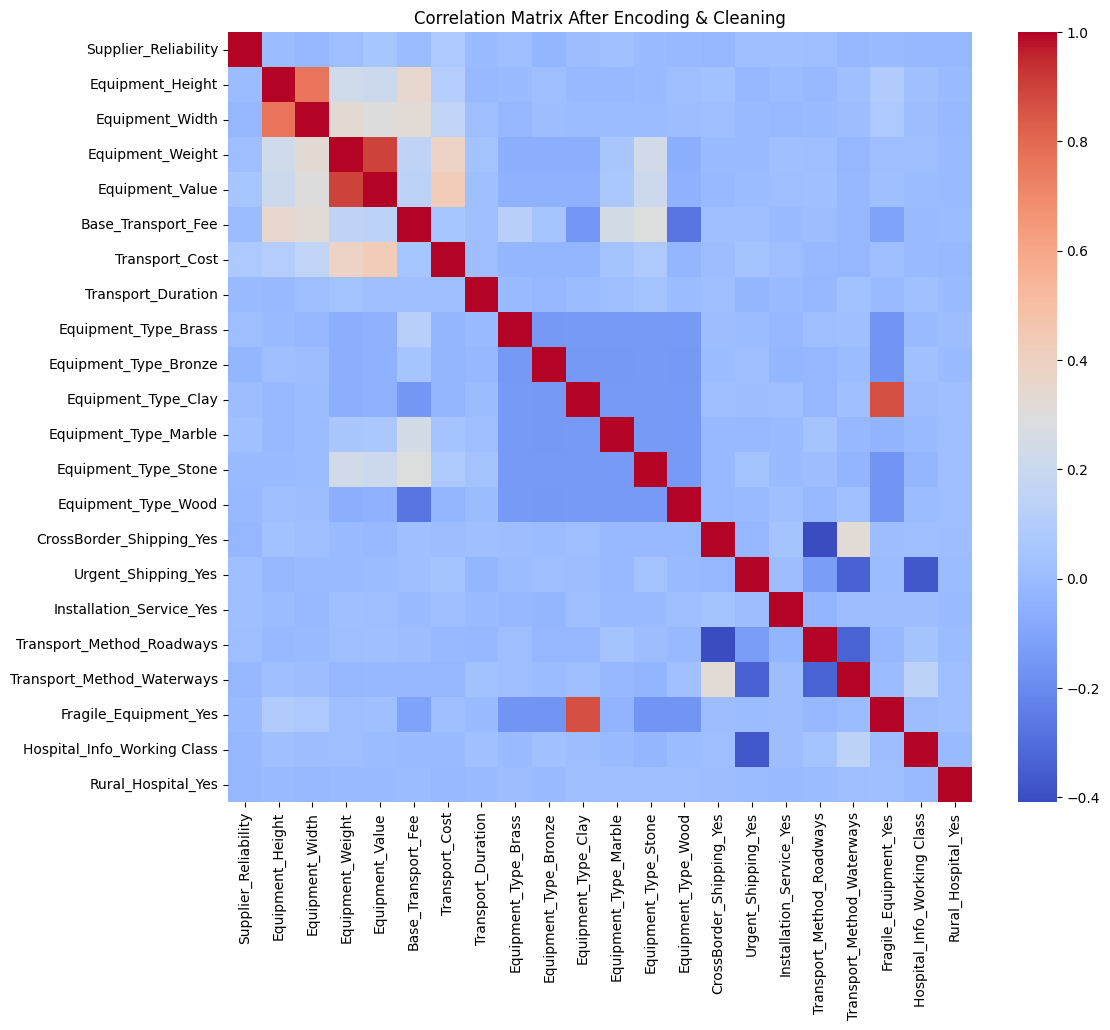

(                             Supplier_Reliability  Equipment_Height  \
 Supplier_Reliability                     1.000000          0.000867   
 Equipment_Height                         0.000867          1.000000   
 Equipment_Width                         -0.017410          0.766011   
 Equipment_Weight                         0.011757          0.224486   
 Equipment_Value                          0.050766          0.208200   
 Base_Transport_Fee                       0.003926          0.354693   
 Transport_Cost                           0.070436          0.105225   
 Transport_Duration                      -0.002075         -0.010755   
 Equipment_Type_Brass                     0.011591         -0.003504   
 Equipment_Type_Bronze                   -0.028979          0.010002   
 Equipment_Type_Clay                      0.006376         -0.010243   
 Equipment_Type_Marble                    0.021926         -0.012380   
 Equipment_Type_Stone                    -0.006646         -0.00

In [ ]:
def process_and_get_top_correlations(df, drop_cols=None, scale=False, top_n=10, plot=True):
    """
    Clean dataset, encode, compute correlations, and show top correlated features.

    Parameters:
    ----------
    df : pd.DataFrame
        Input dataset
    drop_cols : list
        Columns to remove before processing (e.g., IDs, text fields)
    scale : bool
        If True, applies StandardScaler after encoding
    top_n : int
        Number of top correlated feature pairs to return
    plot : bool
        If True, shows correlation heatmap

    Returns:
    -------
    corr_matrix : pd.DataFrame
        Full correlation matrix
    top_corrs : pd.DataFrame
        Top N correlation pairs (absolute value, excluding self-correlation)
    """
    df_temp = df.copy()
    df_temp = data_transform_CALCULATE_DURATION(df_temp, df_temp)[0]
    # 1️⃣ Drop unwanted columns
    if drop_cols:
        df_temp = df_temp.drop(columns=drop_cols, errors='ignore')

    # 2️⃣ One-hot encode categorical variables
    df_encoded = pd.get_dummies(df_temp, drop_first=True)

    # 3️⃣ Optional: Standard scaling
    if scale:
        scaler = StandardScaler()
        df_encoded = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)

    # 4️⃣ Compute correlation matrix
    corr_matrix = df_encoded.corr()

    # 5️⃣ Extract top N correlated pairs
    corr_unstacked = corr_matrix.abs().unstack()
    corr_unstacked = corr_unstacked[corr_unstacked.index.get_level_values(0) != corr_unstacked.index.get_level_values(1)]
    corr_sorted = corr_unstacked.sort_values(ascending=False).drop_duplicates()
    top_corrs = corr_sorted.head(top_n).reset_index()
    top_corrs.columns = ['Feature_1', 'Feature_2', 'Correlation']

    # 6️⃣ Optional: Plot heatmap
    if plot:
        plt.figure(figsize=(12, 10))
        sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
        plt.title('Correlation Matrix After Encoding & Cleaning')
        plt.show()

    return corr_matrix, top_corrs
process_and_get_top_correlations(DATASET_TRAIN,drop_cols=["Hospital_Id","Supplier_Name","Hospital_Location","Order_Placed_Date","Delivery_Date"])

# Stage 2 - ML Model Training

Few Ideas to try out
1. Naive Bayes
2. Linear Regression (undersampled/oversampled/no preprocessing)
3. Polynomial Regression
4. Bayes Classifier
5. K-Nearest Neighbours
6. Gradient Descent (XGBoost/AdaBoost)
7. Applying Regularisation like L1,L2..


Using stuff like LIME to do analysis on the observations.

In [ ]:
# DO NOT DELETE THIS CODEBLOCK/MODIFY THIS
# data_transform_OPERATION(train_dataset, test_dataset): returns (train_modi, test_modi):
  # this model takes a training and test dataset, and then performs certain operation on the dataset.

# Store the results after the operation under suitably titled different variables.
# This way, we can try out different models with same dataset/ same model with different dataset, etc.
# If it causes issues, like memory overload, we can always comment those necessary global functions out.
# WARNING: Always put random_state=42, wherever necessary/required.........


# train_model_X(train_dataset, valid_dataset, test_dataset, opt_param, model_id):   returns model.
  # this function takes, trains the model, based on the opt_param (like RMSE, R^2, etc...)
  # Following this, it prints out the model metrics. and also prints the diagram of the model metrics.
  # Following this, it saves the model in localstorage/filestorage, under model_id.....


# To use the model/operation....
# model_simulate_I():    I-> instance_ID:
    # do appropriate data transformations...
    # choose appropriate train_model_X
    # see what the results are.....
# Keep Each of these on seperate code blocks......
# KEEP All Imports in the global imports..... Dont import inside functions if possible, UNLESS it causes dependency issues.

## Data Transform Functions

In [ ]:
def data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset, columns_to_drop = ['Hospital_Id', 'Hospital_Location']):
  """Removes specified unnecessary columns from the datasets."""
  train_modi = train_dataset.copy()
  test_modi = test_dataset.copy()

  # all values are unique.....

  train_modi = train_modi.drop(columns=columns_to_drop, errors='ignore')
  test_modi = test_modi.drop(columns=columns_to_drop, errors='ignore')

  return train_modi,test_modi

In [ ]:
def data_transform_CONVERT_DATETIME_COLUMNS(train_dataset, test_dataset, datetime_columns):
  """Converts all datetime-like columns (e.g. '1Jan15') into Day, Month, Year columns in both datasets."""

  train_modi = train_dataset.copy()
  test_modi = test_dataset.copy()

  for col in datetime_columns:
          if col in train_modi.columns:
              # Parse as datetime
              train_modi[col] = pd.to_datetime(train_modi[col], errors='coerce')
              # Create Day, Month, Year columns
              train_modi[f"{col}_Day"] = train_modi[col].dt.day
              train_modi[f"{col}_Month"] = train_modi[col].dt.month
              train_modi[f"{col}_Year"] = train_modi[col].dt.year

  for col in datetime_columns:
          if col in test_modi.columns:
              # Parse as datetime
              test_modi[col] = pd.to_datetime(test_modi[col], errors='coerce')
              # Create Day, Month, Year columns
              test_modi[f"{col}_Day"] = test_modi[col].dt.day
              test_modi[f"{col}_Month"] = test_modi[col].dt.month
              test_modi[f"{col}_Year"] = test_modi[col].dt.year

  return train_modi, test_modi

In [ ]:
def data_transform_CALCULATE_DURATION(train_dataset, test_dataset):
  """ Calculates time for order fullfillment """
  train_modi = train_dataset.copy()
  test_modi = test_dataset.copy()

  train_modi['Transport_Duration'] = pd.to_datetime(train_modi['Delivery_Date']) - pd.to_datetime(train_modi['Order_Placed_Date'])
  train_modi['Transport_Duration'] = train_modi['Transport_Duration'].dt.days

  test_modi['Transport_Duration'] = pd.to_datetime(test_modi['Delivery_Date']) - pd.to_datetime(test_modi['Order_Placed_Date'])
  test_modi['Transport_Duration'] = test_modi['Transport_Duration'].dt.days

  ## In additional you could apply removal of these intermediary columns
  # return data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Transport_Date", "Order_Date"]);

  return train_modi, test_modi

In [ ]:
# def data_transform_REMOVE_ALL_NON_ZERO(train_dataset, test_dataset):
#     """Removes all rows with any non-zero values."""
#     train_modi = train_dataset.copy()
#     test_modi = test_dataset.copy()

#     # Identify columns with non-zero values
#     non_zero_cols_train = train_modi.columns[(train_modi != 0).any()]
#     non_zero_cols_test = test_modi.columns[(test_modi != 0).any()]

#     # Drop rows with non-zero values in the identified columns
#     train_modi = train_modi.loc[(train_modi[non_zero_cols_train] == 0).all(axis=1)]
#     test_modi = test_modi.loc[(test_modi[non_zero_cols_test] == 0).all(axis=1)]

#     return train_modi, test_modi

In [ ]:
def data_transform_REMOVE_ALL_NULL(train_dataset, test_dataset):
    """Removes all rows with any null values."""
    train_modi = train_dataset.copy()
    test_modi = test_dataset.copy()

    train_modi = train_modi.dropna()
    test_modi = test_modi.dropna()

    return train_modi, test_modi

In [ ]:
import numpy as np

def data_transform_REMOVE_OUTSIDE_PERCENTILE(train_dataset, test_dataset, column_name, percentile_range=[0, 99]):
    """
    Removes rows from both train and test datasets where the specified column
    falls outside the given percentile range.

    Parameters
    ----------
    train_dataset : pd.DataFrame
        Training dataset.
    test_dataset : pd.DataFrame
        Testing dataset.
    column_name : str
        Name of the column to apply percentile filtering on.
    percentile_range : list of [lower_percentile, upper_percentile]
        Percentile bounds to keep, e.g., [1, 99] or [0, 95].

    Returns
    -------
    train_modi, test_modi : pd.DataFrame
        Filtered copies of the train and test datasets.
    """

    train_modi = train_dataset.copy()
    test_modi = test_dataset.copy()

    # Compute percentile thresholds on the training data only (to avoid data leakage)
    lower_bound, upper_bound = np.percentile(train_modi[column_name], percentile_range)

    # Filter rows within the range
    train_modi = train_modi[
        (train_modi[column_name] >= lower_bound) & (train_modi[column_name] <= upper_bound)
    ]

    print(f"Removed values outside {percentile_range[0]}th–{percentile_range[1]}th percentiles "
          f"({lower_bound:.3f} to {upper_bound:.3f}).")
    print(f"Train shape: {train_modi.shape}, Test shape: {test_modi.shape}")

    return train_modi, test_modi


In [ ]:
def data_transform_REPLACE_NON_ZERO_MEAN(train_dataset, test_dataset):
    """Replaces non-zero values with the mean of the column."""
    train_modi = train_dataset.copy()
    test_modi = test_dataset.copy()

    for col in train_modi.columns:
        if train_modi[col].dtype in ['float64', 'int64']:
            mean_val = train_modi[col][train_modi[col] != 0].mean()
            train_modi[col] = train_modi[col].replace(0, mean_val)

    for col in test_modi.columns:
        if test_modi[col].dtype in ['float64', 'int64']:
             # Use the mean from the training data to avoid data leakage
            mean_val = train_dataset[col][train_dataset[col] != 0].mean()
            test_modi[col] = test_modi[col].replace(0, mean_val)

    return train_modi, test_modi

In [ ]:
def data_transform_REPLACE_NON_ZERO_MEDIAN(train_dataset, test_dataset):
    """Replaces non-zero values with the median of the column."""
    train_modi = train_dataset.copy()
    test_modi = test_dataset.copy()

    for col in train_modi.columns:
        if train_modi[col].dtype in ['float64', 'int64']:
            median_val = train_modi[col][train_modi[col] != 0].median()
            train_modi[col] = train_modi[col].replace(0, median_val)

    for col in test_modi.columns:
        if test_modi[col].dtype in ['float64', 'int64']:
             # Use the median from the training data to avoid data leakage
            median_val = train_dataset[col][train_dataset[col] != 0].median()
            test_modi[col] = test_modi[col].replace(0, median_val)

    return train_modi, test_modi

In [ ]:
def data_transform_SPLIT_TRAIN_TO_TV(train_dataset, size = 0.2, random_state = 42):
  """Splits the training dataset into training and validation sets."""
  train_modi = train_dataset.copy()
  X = train_modi.drop('Transport_Cost', axis=1)
  y = train_modi['Transport_Cost']

  X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=size, random_state=random_state)

  train_split = pd.concat([X_train, y_train], axis=1)
  valid_split = pd.concat([X_valid, y_valid], axis=1)

  return train_split, valid_split

In [ ]:
def data_transform_REMOVE_HIGHLY_CORRELATED(train_dataset, test_dataset):
  """Removes the highly correlated columns - Equipment_Width and Equipment_Weight"""
  return data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset, ["Equipment_Width","Equipment_Weight"])  # rationale-> higher correlation+ more data points.

In [ ]:
def data_transform_COLUMN_MEDIAN(train_dataset, test_dataset, column_name):
    """Imputes missing numeric values with the median from the training dataset."""
    train_modi = train_dataset.copy()
    test_modi = test_dataset.copy()

    median_val = train_modi[column_name].median()
    train_modi[column_name] = train_modi[column_name].fillna(median_val)
    test_modi[column_name] = test_modi[column_name].fillna(median_val)

    return train_modi, test_modi

In [ ]:
def data_transform_COLUMN_MEAN(train_dataset, test_dataset, column_name):
    """Imputes missing numeric values with the mean from the training dataset."""
    train_modi = train_dataset.copy()
    test_modi = test_dataset.copy()

    mean_val = train_modi[column_name].mean()
    train_modi[column_name] = train_modi[column_name].fillna(mean_val)
    test_modi[column_name] = test_modi[column_name].fillna(mean_val)

    return train_modi, test_modi


In [ ]:
def data_transform_COLUMN_MODE(train_dataset, test_dataset, column_name):
    """Imputes missing categorical values with the mode (most frequent) from the training dataset."""
    train_modi = train_dataset.copy()
    test_modi = test_dataset.copy()

    mode_val = train_modi[column_name].mode()[0]
    train_modi[column_name] = train_modi[column_name].fillna(mode_val)
    test_modi[column_name] = test_modi[column_name].fillna(mode_val)

    return train_modi, test_modi


In [ ]:
def data_transform_COLUMN_UNKNOWN(train_dataset, test_dataset, column_name):
    """Imputes missing categorical values with UNKNOWN value."""
    train_modi = train_dataset.copy()
    test_modi = test_dataset.copy()

    train_modi[column_name] = train_modi[column_name].fillna("UNKNOWN")
    test_modi[column_name] = test_modi[column_name].fillna("UNKNOWN")

    return train_modi, test_modi


In [ ]:
def data_transform_COLUMN_GROUP_MEDIAN(train_dataset, test_dataset, target_col, group_col):
    """Imputes missing numeric values in target_col using the group-wise median from training data."""
    train_modi = train_dataset.copy()
    test_modi = test_dataset.copy()

    group_medians = train_modi.groupby(group_col)[target_col].median()

    # Fill training data
    train_modi[target_col] = train_modi.apply(
        lambda x: group_medians[x[group_col]] if pd.isna(x[target_col]) and x[group_col] in group_medians else x[target_col],
        axis=1
    )

    # Fill test data (only using group medians from training)
    test_modi[target_col] = test_modi.apply(
        lambda x: group_medians[x[group_col]] if pd.isna(x[target_col]) and x[group_col] in group_medians else x[target_col],
        axis=1
    )

    # Fill remaining nulls (groups unseen in training)
    median_val = train_modi[target_col].median()
    train_modi[target_col] = train_modi[target_col].fillna(median_val)
    test_modi[target_col] = test_modi[target_col].fillna(median_val)

    return train_modi, test_modi

In [ ]:
def data_transform_COLUMN_GROUP_MEAN(train_dataset, test_dataset, target_col, group_col):
    """Imputes missing numeric values in target_col using the group-wise mean from training data."""
    train_modi = train_dataset.copy()
    test_modi = test_dataset.copy()

    group_means = train_modi.groupby(group_col)[target_col].mean()

    # Fill training data
    train_modi[target_col] = train_modi.apply(
        lambda x: group_means[x[group_col]] if pd.isna(x[target_col]) and x[group_col] in group_means else x[target_col],
        axis=1
    )

    # Fill test data (only using group means from training)
    test_modi[target_col] = test_modi.apply(
        lambda x: group_means[x[group_col]] if pd.isna(x[target_col]) and x[group_col] in group_means else x[target_col],
        axis=1
    )

    # Fill remaining nulls (groups unseen in training)
    mean_val = train_modi[target_col].mean()
    train_modi[target_col] = train_modi[target_col].fillna(mean_val)
    test_modi[target_col] = test_modi[target_col].fillna(mean_val)

    return train_modi, test_modi

## Helper Functions

In [ ]:
def get_preprocessor(train_dataset):
  num_cols = train_dataset.select_dtypes(include=["float64", "int64"]).columns
  cat_cols = train_dataset.select_dtypes(include=["object", "bool"]).columns
  preprocessor = ColumnTransformer([
      ("num", StandardScaler(), num_cols),
      ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
  ])
  return preprocessor

In [ ]:
def print_mse_r2(predictions, y_valid):
    mse = mean_squared_error(y_valid, predictions)
    r2 = r2_score(y_valid, predictions)
    print(f"MSE: {mse}")
    print(f"R2: {r2}")

## Train Model Functions

In [ ]:
def train_model_LinearRegression(train_dataset, valid_dataset, test_dataset, opt_param, model_id):
    """Trains a Linear Regression model and evaluates it."""
    X_train, y_train = train_dataset.drop('Transport_Cost', axis=1), train_dataset['Transport_Cost']
    X_valid, y_valid = valid_dataset.drop('Transport_Cost', axis=1), valid_dataset['Transport_Cost']
    # X_test = test_dataset.drop('Transport_Cost', axis=1) #z Assuming test_dataset doesn't have Transport_Cost
    preprocessor = get_preprocessor(X_train)

    model = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", LinearRegression())
    ])

    model.fit(X_train, y_train)
    predictions = model.predict(X_valid)

    print_mse_r2(predictions, y_valid)
    # You can add plotting and saving the model here based on opt_param

    return model

In [ ]:
def train_model_Lasso(train_dataset, valid_dataset, test_dataset, opt_param, model_id):
    """Trains a Lasso model and evaluates it."""
    X_train, y_train = train_dataset.drop('Transport_Cost', axis=1), train_dataset['Transport_Cost']
    X_valid, y_valid = valid_dataset.drop('Transport_Cost', axis=1), valid_dataset['Transport_Cost']
    # X_test = test_dataset.drop('Transport_Cost', axis=1) #z Assuming test_dataset doesn't have Transport_Cost
    preprocessor = get_preprocessor(X_train)

    model = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", Lasso(alpha=0.8,random_state=42))
    ])

    model.fit(X_train, y_train)
    predictions = model.predict(X_valid)

    print_mse_r2(predictions, y_valid)
    # You can add plotting and saving the model here based on opt_param

    return model

In [ ]:
def train_model_Ridge(train_dataset, valid_dataset, test_dataset, opt_param, model_id, alpha=0.8):
    """Trains a Ridge model and evaluates it."""
    X_train, y_train = train_dataset.drop('Transport_Cost', axis=1), train_dataset['Transport_Cost']
    X_valid, y_valid = valid_dataset.drop('Transport_Cost', axis=1), valid_dataset['Transport_Cost']
    # X_test = test_dataset.drop('Transport_Cost', axis=1) #z Assuming test_dataset doesn't have Transport_Cost
    preprocessor = get_preprocessor(X_train)

    model = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", Ridge(alpha=alpha,random_state=42))
    ])

    model.fit(X_train, y_train)
    predictions = model.predict(X_valid)

    print_mse_r2(predictions, y_valid)
    # You can add plotting and saving the model here based on opt_param

    return model

In [ ]:
def train_model_BayesianRidge(train_dataset, valid_dataset, test_dataset, opt_param, model_id):
    """Trains a Bayesian Ridge Regression model and evaluates it."""
    # Split features and target
    X_train, y_train = train_dataset.drop('Transport_Cost', axis=1), train_dataset['Transport_Cost']
    X_valid, y_valid = valid_dataset.drop('Transport_Cost', axis=1), valid_dataset['Transport_Cost']
    # X_test = test_dataset.drop('Transport_Cost', axis=1)  # Uncomment if needed

    # Get preprocessing pipeline
    preprocessor = get_preprocessor(X_train)

    # Define the model pipeline
    model = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", BayesianRidge(
            max_iter=400,             # Number of iterations for convergence
            tol=1e-3,               # Tolerance for stopping criteria
            compute_score=True,     # Compute log marginal likelihood during fitting
            fit_intercept=True,     # Fit intercept term
            copy_X=True,
            verbose=True,
        ))
    ])

    # Train the model
    model.fit(X_train, y_train)

    # Predict on validation data
    predictions = model.predict(X_valid)

    # Evaluate performance
    print_mse_r2(predictions, y_valid)

    # Optional: add plotting, saving, or hyperparameter tracking using opt_param or model_id
    return model

In [ ]:
def optimize_BayesianRidge(train_dataset, valid_dataset, test_dataset, opt_param, model_id):
    """Trains a Bayesian Ridge model with hyperparameter tuning and evaluates it."""

    # Split data
    X_train, y_train = train_dataset.drop('Transport_Cost', axis=1), train_dataset['Transport_Cost']
    X_valid, y_valid = valid_dataset.drop('Transport_Cost', axis=1), valid_dataset['Transport_Cost']
    # X_test = test_dataset.drop('Transport_Cost', axis=1)  # Uncomment if needed

    # Preprocessing pipeline (same as Ridge)
    preprocessor = get_preprocessor(X_train)

    # Build pipeline
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", BayesianRidge())
    ])

    # Define hyperparameter grid for tuning
    param_grid = {
        "regressor__alpha_1": [1e-6, 1e-5, 1e-4],
        "regressor__alpha_2": [1e-6, 1e-5, 1e-4],
        "regressor__lambda_1": [1e-6, 1e-5, 1e-4],
        "regressor__lambda_2": [1e-6, 1e-5, 1e-4],
        "regressor__max_iter": [300, 500, 1000]
    }

    # Set up GridSearchCV to minimize MSE
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        scoring='neg_mean_squared_error',  # Negative because sklearn maximizes scores
        cv=5,  # 5-fold cross-validation
        n_jobs=-1,
        verbose=2
    )

    # Fit the model with hyperparameter tuning
    grid_search.fit(X_train, y_train)

    # Get the best model
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Predict on validation set
    predictions = best_model.predict(X_valid)

    # Evaluate
    mse = mean_squared_error(y_valid, predictions)
    r2 = r2_score(y_valid, predictions)

    print(f"\nBest Hyperparameters: {best_params}")
    print(f"Validation MSE: {mse:.4f}")
    print(f"Validation R²: {r2:.4f}")

    # Optional: you can call your print_mse_r2() instead
    # print_mse_r2(predictions, y_valid)

    # You could also log/save best_model and opt_param/model_id here if needed

    return best_model

In [ ]:
def train_model_ElasticNet(train_dataset, valid_dataset, test_dataset, opt_param, model_id,alpha=1, l1_ratio=0.5,max_iter=1000):
    """Trains a EN model and evaluates it."""
    X_train, y_train = train_dataset.drop('Transport_Cost', axis=1), train_dataset['Transport_Cost']
    X_valid, y_valid = valid_dataset.drop('Transport_Cost', axis=1), valid_dataset['Transport_Cost']
    # X_test = test_dataset.drop('Transport_Cost', axis=1) #z Assuming test_dataset doesn't have Transport_Cost
    preprocessor = get_preprocessor(X_train)

    model = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", ElasticNet(alpha=alpha,l1_ratio=l1_ratio,random_state=42,max_iter=max_iter))
    ])

    model.fit(X_train, y_train)
    predictions = model.predict(X_valid)

    print_mse_r2(predictions, y_valid)
    # You can add plotting and saving the model here based on opt_param

    return model

In [ ]:
def train_model_RandomForestRegressor(train_dataset, valid_dataset, test_dataset, opt_param, model_id, **kwargs):
    """Trains a RandomForest Regressor model and evaluates it."""
    X_train, y_train = train_dataset.drop('Transport_Cost', axis=1), train_dataset['Transport_Cost']
    X_valid, y_valid = valid_dataset.drop('Transport_Cost', axis=1), valid_dataset['Transport_Cost']
    # X_test = test_dataset.drop('Transport_Cost', axis=1) #z Assuming test_dataset doesn't have Transport_Cost
    preprocessor = get_preprocessor(X_train)

    rf_defaults = {'n_estimators':200}
    for k, v in rf_defaults.items():
        kwargs.setdefault(k, v)

    model = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", RandomForestRegressor(random_state=42, **kwargs)) #default-criterion = mse...
    ])

    model.fit(X_train, y_train)
    predictions = model.predict(X_valid)

    print_mse_r2(predictions, y_valid)
    # You can add plotting and saving the model here based on opt_param

    return model

In [ ]:
def train_model_PolynomialRegression(train_dataset, valid_dataset, test_dataset, opt_param, model_id, degree=2, regressor=LinearRegression()):
    """Trains a Polynomial Regression model and evaluates it."""
    X_train, y_train = train_dataset.drop('Transport_Cost', axis=1), train_dataset['Transport_Cost']
    X_valid, y_valid = valid_dataset.drop('Transport_Cost', axis=1), valid_dataset['Transport_Cost']

    preprocessor = get_preprocessor(X_train)

    model = Pipeline([
        ("preprocessor", preprocessor),
        ("poly_features", PolynomialFeatures(degree=degree)),  # Add polynomial features
        ("scaler_2", StandardScaler()),
        ("regressor", regressor)
    ])

    model.fit(X_train, y_train)
    predictions = model.predict(X_valid)

    print_mse_r2(predictions, y_valid)
    # You can add plotting and saving the model here based on opt_param

    return model

In [ ]:
def train_model_GradientBoosting(train_dataset, valid_dataset, test_dataset, opt_param, model_id, **kwargs):
    """Trains a Gradient Boosting model and evaluates it."""
    X_train, y_train = train_dataset.drop('Transport_Cost', axis=1), train_dataset['Transport_Cost']
    X_valid, y_valid = valid_dataset.drop('Transport_Cost', axis=1), valid_dataset['Transport_Cost']

    preprocessor = get_preprocessor(X_train)

    gb_defaults = {'n_estimators': 1000, 'learning_rate': 0.1}
    for k, v in gb_defaults.items():
        kwargs.setdefault(k, v)

    model = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", GradientBoostingRegressor(random_state=42, **kwargs))
    ])

    model.fit(X_train, y_train)
    predictions = model.predict(X_valid)

    print_mse_r2(predictions, y_valid)
    # You can add plotting and saving the model here based on opt_param

    return model


In [ ]:
def train_model_BaggingLinear(train_dataset, valid_dataset, test_dataset, opt_param, model_id,
                              base_regressor=LinearRegression(), n_estimators=10, max_samples=0.8, degree=None):
    """
    Trains a Bagging Regressor with a linear model base estimator (optionally polynomial features)
    """
    X_train, y_train = train_dataset.drop('Transport_Cost', axis=1), train_dataset['Transport_Cost']
    X_valid, y_valid = valid_dataset.drop('Transport_Cost', axis=1), valid_dataset['Transport_Cost']

    preprocessor = get_preprocessor(X_train)

    steps = [("preprocessor", preprocessor)]

    # Add polynomial features if degree is specified
    if degree is not None and degree > 1:
        steps.append(("poly_features", PolynomialFeatures(degree=degree)))

    steps.append(("scaler", StandardScaler()))

    bagging_model = BaggingRegressor(
        estimator=base_regressor,
        n_estimators=n_estimators,
        max_samples=max_samples,
        random_state=42
    )

    steps.append(("regressor", bagging_model))

    model = Pipeline(steps)

    model.fit(X_train, y_train)
    predictions = model.predict(X_valid)

    print_mse_r2(predictions, y_valid)

    return model

In [ ]:
def optimize_GradientBoosting(train_dataset, valid_dataset,test_dataset, opt_param, model_id):
    X_train, y_train = train_dataset.drop('Transport_Cost', axis=1), train_dataset['Transport_Cost']
    # X_valid, y_valid = valid_dataset.drop('Transport_Cost', axis=1), valid_dataset['Transport_Cost']

    preprocessor = get_preprocessor(X_train)

    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", GradientBoostingRegressor(random_state=42))
    ])

    # Define the hyperparameter grid
    param_grid = {
        "regressor__n_estimators": [500,1000,2000, 3000],
        "regressor__learning_rate": [0.05, 0.1, 0.2],
        "regressor__max_depth": [1, 2, 3, 4,5],
    }

    # Grid search setup
    grid_search = GridSearchCV(
        pipeline,
        param_grid,
        scoring='neg_mean_squared_error',       # or 'neg_mean_squared_error'
        cv=3,               # cross-validation folds       # use all CPU cores
        verbose=3
    )

    grid_search.fit(X_train, y_train)

    print(f"Best params: {grid_search.best_params_}")
    print(f"Best CV score: {grid_search.best_score_:.4f}")

    # Evaluate on validation data
    best_model = grid_search.best_estimator_

    return best_model

In [ ]:
def train_model_AdaBoost(train_dataset, valid_dataset, test_dataset, opt_param, model_id, **kwargs):
    """Trains an AdaBoost model and evaluates it."""
    X_train, y_train = train_dataset.drop('Transport_Cost', axis=1), train_dataset['Transport_Cost']
    X_valid, y_valid = valid_dataset.drop('Transport_Cost', axis=1), valid_dataset['Transport_Cost']

    preprocessor = get_preprocessor(X_train)

    # Default parameters for AdaBoost
    ab_defaults = {'n_estimators': 100, 'learning_rate': 1.0}
    for k, v in ab_defaults.items():
        kwargs.setdefault(k, v)

    model = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", AdaBoostRegressor(random_state=42, **kwargs))
    ])

    model.fit(X_train, y_train)
    predictions = model.predict(X_valid)

    print_mse_r2(predictions, y_valid)
    # Optionally add plotting and saving logic here based on opt_param

    return model

In [ ]:
def optimize_AdaBoost(train_dataset, valid_dataset, test_dataset, opt_param, model_id):
    X_train, y_train = train_dataset.drop('Transport_Cost', axis=1), train_dataset['Transport_Cost']

    preprocessor = get_preprocessor(X_train)

    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", AdaBoostRegressor(random_state=42))
    ])

    # Define hyperparameter grid
    param_grid = {
        "regressor__n_estimators": [50, 100, 200, 500],
        "regressor__learning_rate": [0.01, 0.1, 0.5, 1.0],
        "regressor__loss": ['linear', 'square', 'exponential']
    }

    # Grid search setup
    grid_search = GridSearchCV(
        pipeline,
        param_grid,
        scoring='neg_mean_squared_error',
        cv=3,
        verbose=3
    )

    grid_search.fit(X_train, y_train)

    print(f"Best params: {grid_search.best_params_}")
    print(f"Best CV score: {grid_search.best_score_:.4f}")

    best_model = grid_search.best_estimator_

    return best_model

In [ ]:
def optimize_LassoCV(train_dataset, valid_dataset,test_dataset, opt_param, model_id):
    X_train, y_train = train_dataset.drop('Transport_Cost', axis=1), train_dataset['Transport_Cost']

    preprocessor = get_preprocessor(X_train)

    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", LassoCV(alphas=None,      # None = use internal logarithmic grid
                               cv=5,            # 5-fold CV for alpha selection
                               max_iter=5000,
                               random_state=42))
    ])

    print("Starting LassoCV fitting...")
    pipeline.fit(X_train, y_train)
    print("LassoCV Completed.")

    best_alpha = pipeline.named_steps["regressor"].alpha_
    print(f"Best alpha found: {best_alpha}")

    return pipeline

In [ ]:
def optimize_LassoCV_(train_dataset, valid_dataset,test_dataset, opt_param, model_id):
    X_train, y_train = train_dataset.drop('Transport_Cost', axis=1), train_dataset['Transport_Cost']

    preprocessor = get_preprocessor(X_train)

    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", LassoCV(alphas=np.logspace(-4, 2, 50),      # None = use internal logarithmic grid
                               cv=5,            # 5-fold CV for alpha selection
                               max_iter=5000,
                               random_state=42))
    ])

    print("Starting LassoCV fitting...")
    pipeline.fit(X_train, y_train)
    print("LassoCV Completed.")

    best_alpha = pipeline.named_steps["regressor"].alpha_
    print(f"Best alpha found: {best_alpha}")

    return pipeline

In [ ]:
def optimize_LassoCVPoly(train_dataset, valid_dataset,test_dataset, opt_param, model_id, degree=2):
    X_train, y_train = train_dataset.drop('Transport_Cost', axis=1), train_dataset['Transport_Cost']

    preprocessor = get_preprocessor(X_train)

    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("poly_features", PolynomialFeatures(degree=degree)),  # Add polynomial features
        ("scaler", StandardScaler()),
        ("regressor", LassoCV(alphas=None,      # None = use internal logarithmic grid
                               cv=5,            # 5-fold CV for alpha selection
                               max_iter=5000,
                               random_state=42))
    ])

    print("Starting LassoCV fitting...")
    pipeline.fit(X_train, y_train)
    print("LassoCV Completed.")

    best_alpha = pipeline.named_steps["regressor"].alpha_
    print(f"Best alpha found: {best_alpha}")

    return pipeline

In [ ]:
def optimize_LassoCVPolyPCA(train_dataset, valid_dataset,test_dataset, opt_param, model_id, degree=2):
    X_train, y_train = train_dataset.drop('Transport_Cost', axis=1), train_dataset['Transport_Cost']

    preprocessor = get_preprocessor(X_train)

    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("poly_features", PolynomialFeatures(degree=degree)),  # Add polynomial features
        ("scaler", StandardScaler()),
        ("pca", PCA(n_components=0.95)),  # PCA with 95% variance explained
        # Change to
        ("regressor", LassoCV(alphas=None,      # None = use internal logarithmic grid
                               cv=5,            # 5-fold CV for alpha selection
                               max_iter=5000,
                               random_state=42))
    ])

    print("Starting LassoCV fitting...")
    pipeline.fit(X_train, y_train)
    print("LassoCV Completed.")

    best_alpha = pipeline.named_steps["regressor"].alpha_
    print(f"Best alpha found: {best_alpha}")

    return pipeline

In [ ]:
def optimize_RidgeCVPolyPCA(train_dataset, valid_dataset,test_dataset, opt_param, model_id, degree=2,alphas = [0.01, 0.1, 1.0, 10.0, 100.0]):
    X_train, y_train = train_dataset.drop('Transport_Cost', axis=1), train_dataset['Transport_Cost']

    preprocessor = get_preprocessor(X_train)


    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("poly_features", PolynomialFeatures(degree=degree)),  # Add polynomial features
        ("scaler", StandardScaler()),
        ("pca", PCA(n_components=0.98)),  # PCA with 95% variance explained
        # Change to
        ("regressor", RidgeCV(alphas=alphas,
                              scoring="neg_mean_squared_error"  ,    # None = use internal logarithmic grid
                               cv=5,            # 5-fold CV for alpha selection
                               ))
    ])

    print("Starting RidgeCV fitting...")
    pipeline.fit(X_train, y_train)
    print("RidgeCV Completed.")

    best_alpha = pipeline.named_steps["regressor"].alpha_
    print(f"Best alpha found: {best_alpha}")

    return pipeline

In [ ]:
def optimize_RidgeCV(train_dataset, valid_dataset,test_dataset, opt_param, model_id):
    X_train, y_train = train_dataset.drop('Transport_Cost', axis=1), train_dataset['Transport_Cost']

    preprocessor = get_preprocessor(X_train)

    # Provide a list of alphas to test
    alphas = [0.01, 0.1, 1.0, 10.0, 100.0,1000.0, 10000.0]

    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", RidgeCV(alphas=alphas, cv=5, scoring="neg_mean_squared_error"))
    ])

    print("Starting RidgeCV fitting...")
    pipeline.fit(X_train, y_train)
    print("RidgeCV Completed.")

    best_alpha = pipeline.named_steps["regressor"].alpha_
    print(f"Best alpha found: {best_alpha}")

    return pipeline

In [ ]:
from sklearn.ensemble import RandomForestRegressor

def optimize_RandomForest(train_dataset, valid_dataset,test_dataset, opt_param, model_id):
    X_train, y_train = train_dataset.drop('Transport_Cost', axis=1), train_dataset['Transport_Cost']

    preprocessor = get_preprocessor(X_train)

    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", RandomForestRegressor(random_state=42))
    ])

    param_grid = {
        "regressor__n_estimators": [300, 500, 1000],
        "regressor__max_depth": [None, 10, 20, 30],
        "regressor__max_features": ["sqrt", 0.5, 1]
    }

    grid_search = GridSearchCV(
        pipeline,
        param_grid=param_grid,
        scoring="neg_mean_squared_error",
        cv=3,
        verbose=3
    )

    print("Starting Grid Search for Random Forest...")
    grid_search.fit(X_train, y_train)
    print("Random Forest Grid Search Completed.")

    print(f"Best Params: {grid_search.best_params_}")
    print(f"Best CV Score: {grid_search.best_score_:.4f}")

    return grid_search.best_estimator_

In [ ]:
def optimize_ElasticNet(train_dataset, valid_dataset,test_dataset, opt_param, model_id):
    X_train, y_train = train_dataset.drop('Transport_Cost', axis=1), train_dataset['Transport_Cost']

    preprocessor = get_preprocessor(X_train)

    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", ElasticNetCV(
    l1_ratio=[0.1, 0.3, 0.5, 0.7, 0.9, 1],
    alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10],
    cv=5,
    random_state=42
    ))
    ])

    print("Starting Grid Search for Random Forest...")
    pipeline.fit(X_train, y_train)
    print("Random Forest Grid Search Completed.")

    best_alpha = pipeline.named_steps["regressor"].alpha_
    best_l1_ratio = pipeline.named_steps["regressor"].l1_ratio_
    mse_path = pipeline.named_steps["regressor"].mse_path_.mean(axis=1).min()

    print(f"Best Alpha: {best_alpha}")
    print(f"Best L1 Ratio: {best_l1_ratio}")
    print(f"Lowest Mean CV MSE: {mse_path:.4f}")

    return pipeline

In [ ]:
def optimize_ElasticNetPoly(train_dataset, valid_dataset,test_dataset, opt_param, model_id,degree=1):
    X_train, y_train = train_dataset.drop('Transport_Cost', axis=1), train_dataset['Transport_Cost']

    preprocessor = get_preprocessor(X_train)

    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("poly_features", PolynomialFeatures(degree=degree)),  # Add polynomial features
        ("scaler", StandardScaler()),
        ("regressor", ElasticNetCV(
    l1_ratio=[0.1, 0.3, 0.5, 0.7, 0.9, 1],
    alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10],
    cv=5,
    random_state=42
    ))
    ])

    print("Starting Grid Search for Random Forest...")
    pipeline.fit(X_train, y_train)
    print("Random Forest Grid Search Completed.")

    best_alpha = pipeline.named_steps["regressor"].alpha_
    best_l1_ratio = pipeline.named_steps["regressor"].l1_ratio_
    mse_path = pipeline.named_steps["regressor"].mse_path_.mean(axis=1).min()

    print(f"Best Alpha: {best_alpha}")
    print(f"Best L1 Ratio: {best_l1_ratio}")
    print(f"Lowest Mean CV MSE: {mse_path:.4f}")

    return pipeline

In [ ]:
def train_model_XGBoost(train_dataset, valid_dataset, test_dataset, opt_param, model_id, **kwargs):
    """Trains an XGBoost model and evaluates it."""
    X_train, y_train = train_dataset.drop('Transport_Cost', axis=1), train_dataset['Transport_Cost']
    X_valid, y_valid = valid_dataset.drop('Transport_Cost', axis=1), valid_dataset['Transport_Cost']

    preprocessor = get_preprocessor(X_train)

    # Default parameters (can be overridden by kwargs)
    xgb_defaults = {
        'n_estimators': 300,
        'learning_rate': 0.1,
        'max_depth': 6,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'random_state': 42,
        'n_jobs': -1,
        'objective': 'reg:squarederror'
    }
    for k, v in xgb_defaults.items():
        kwargs.setdefault(k, v)

    model = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", XGBRegressor(**kwargs))
    ])

    model.fit(X_train, y_train)

    predictions = model.predict(X_valid)
    print_mse_r2(predictions, y_valid)

    # Optional: save or plot results if opt_param flags allow
    return model

In [ ]:
def optimize_XGBoost(train_dataset, valid_dataset, test_dataset, opt_param, model_id):
    """Runs GridSearchCV to find the best XGBoost hyperparameters."""
    X_train, y_train = train_dataset.drop('Transport_Cost', axis=1), train_dataset['Transport_Cost']

    preprocessor = get_preprocessor(X_train)

    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1))
    ])

    # Define hyperparameter grid
    param_grid = {
        "regressor__n_estimators": [100, 300, 500],
        "regressor__learning_rate": [0.01, 0.05, 0.1],
        "regressor__max_depth": [4, 6, 8],
        "regressor__subsample": [0.7, 0.85, 1.0],
        "regressor__colsample_bytree": [0.7, 0.85, 1.0]
    }

    grid_search = GridSearchCV(
        pipeline,
        param_grid,
        scoring='neg_mean_squared_error',
        cv=3,
        verbose=3
    )

    grid_search.fit(X_train, y_train)
    print(f"Best params: {grid_search.best_params_}")
    print(f"Best CV score: {grid_search.best_score_:.4f}")

    best_model = grid_search.best_estimator_
    return best_model

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

def train_model_DecisionTree(train_dataset, valid_dataset, test_dataset, opt_param, model_id, **kwargs):
    """Trains a Decision Tree Regressor model and evaluates it."""
    X_train, y_train = train_dataset.drop('Transport_Cost', axis=1), train_dataset['Transport_Cost']
    X_valid, y_valid = valid_dataset.drop('Transport_Cost', axis=1), valid_dataset['Transport_Cost']

    preprocessor = get_preprocessor(X_train)

    # Default parameters (can be overridden by kwargs)
    tree_defaults = {
        'criterion': 'squared_error',  # default in sklearn >=1.0
        'splitter': 'best',
        'max_depth': None,
        'min_samples_split': 2,
        'min_samples_leaf': 1,
        'max_features': None,
        'random_state': 42
    }
    for k, v in tree_defaults.items():
        kwargs.setdefault(k, v)

    model = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", DecisionTreeRegressor(**kwargs))
    ])

    model.fit(X_train, y_train)

    predictions = model.predict(X_valid)
    print_mse_r2(predictions, y_valid)

    # Optional: save or plot results if opt_param flags allow
    return model


## Experiments

In [ ]:
def generate_predictions(model,test_dataset, model_id):
  predictions = model.predict(test_dataset)
  # Create a DataFrame with Hospital_ID and predictions
  predictions_df = pd.DataFrame({'Hospital_Id': DATASET_TEST['Hospital_Id'], 'Transport_Cost_Prediction': predictions})
  # Save the DataFrame to a CSV file
  predictions_df.to_csv(f'{model_id}_predictions.csv', index=False)
  print(f"Predictions saved to {model_id}_predictions.csv")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def visualize_polynomial_model_coefficients(model, X_train, top_n=20):
    """
    Visualizes coefficients of a Polynomial Regression model with Ridge/Lasso/ElasticNet.

    Parameters
    ----------
    model : sklearn Pipeline or similar object
        Must include a PolynomialFeatures transformer and a linear regressor.
    X_train : pandas.DataFrame or numpy.ndarray
        Training data used to fit the model (before polynomial transformation).
    top_n : int, optional
        Number of top features (by absolute coefficient) to visualize. Default is 20.

    Returns
    -------
    coef_df : pandas.DataFrame
        Table of features and corresponding coefficients, sorted by importance.
    """

    # --- Extract the polynomial transformer and the regressor ---
    poly = None
    reg = None
    for name, step in model.named_steps.items():
        from sklearn.preprocessing import PolynomialFeatures
        if isinstance(step, PolynomialFeatures):
            poly = step
        elif hasattr(step, "coef_"):
            reg = step

    if poly is None or reg is None:
        raise ValueError("Model must contain PolynomialFeatures and a linear regressor (Ridge/Lasso/ElasticNet).")

    # --- Get feature names ---
    if isinstance(X_train, pd.DataFrame):
        original_features = X_train.columns
    else:
        original_features = [f"x{i}" for i in range(X_train.shape[1])]

    feature_names = poly.get_feature_names_out()

    # --- Build DataFrame of coefficients ---
    coef = reg.coef_
    coef_df = pd.DataFrame({
        "feature": feature_names,
        "coefficient": coef,
        "abs_coefficient": np.abs(coef)
    }).sort_values(by="abs_coefficient", ascending=False)

    # --- Plot top N coefficients ---
    top_features = coef_df.head(top_n)
    plt.figure(figsize=(10, 6))
    plt.barh(top_features["feature"][::-1], top_features["coefficient"][::-1])
    plt.xlabel("Coefficient Value")
    plt.ylabel("Feature")
    plt.title(f"Top {top_n} Most Important Polynomial Features")
    plt.tight_layout()
    plt.show()

    return coef_df

### 1-10

In [ ]:
def experiment_1(train_dataset, test_dataset, opt_param, model_id = "exp1"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    model = train_model_LinearRegression(train, valid, test, opt_param, model_id)
    return model

In [ ]:
def experiment_2(train_dataset, test_dataset, opt_param, model_id = "exp2"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    model = train_model_Lasso(train, valid, test, opt_param, model_id)
    return model

In [ ]:
def experiment_3(train_dataset, test_dataset, opt_param, model_id = "exp3"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    model = train_model_Ridge(train, valid, test, opt_param, model_id)
    return model

In [ ]:
def experiment_4(train_dataset, test_dataset, opt_param, model_id = "exp4"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    model = train_model_RandomForestRegressor(train, valid, test, opt_param, model_id)
    return model

In [ ]:
def experiment_5(train_dataset, test_dataset, opt_param, model_id = "exp5"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    model = train_model_PolynomialRegression(train, valid, test, opt_param, model_id, degree=5)
    return model

In [ ]:
def experiment_6(train_dataset, test_dataset, opt_param, model_id = "exp6"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    model = train_model_PolynomialRegression(train, valid, test, opt_param, model_id, degree=5, regressor = Lasso(alpha=0.8,random_state=42))
    return model

In [ ]:
def experiment_7(train_dataset, test_dataset, opt_param, model_id = "exp7"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    model = train_model_PolynomialRegression(train, valid, test, opt_param, model_id, degree=5, regressor = Ridge(alpha=0.8))
    return model

In [ ]:
def experiment_8(train_dataset, test_dataset, opt_param, model_id = "exp8"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_LinearRegression(train, valid, test, opt_param, model_id)
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_9(train_dataset, test_dataset, opt_param, model_id = "exp9"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_Lasso(train, valid, test, opt_param, model_id)
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_10(train_dataset, test_dataset, opt_param, model_id = "exp10"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_Ridge(train, valid, test, opt_param, model_id)
    generate_predictions(model,test, model_id)
    return model

###11-20

In [ ]:
def experiment_11(train_dataset, test_dataset, opt_param, model_id = "exp11"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_PolynomialRegression(train, valid, test, opt_param, model_id, degree=2)
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_12(train_dataset, test_dataset, opt_param, model_id = "exp12"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_PolynomialRegression(train, valid, test, opt_param, model_id, degree=2, regressor = Lasso(alpha=0.8,random_state=42))
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_13(train_dataset, test_dataset, opt_param, model_id = "exp13"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_PolynomialRegression(train, valid, test, opt_param, model_id, degree=2, regressor = Ridge(alpha=0.8))
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_14(train_dataset, test_dataset, opt_param, model_id = "exp14"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_RandomForestRegressor(train, valid, test, opt_param, model_id)
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_15(train_dataset, test_dataset, opt_param, model_id = "exp15"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_GradientBoosting(train, valid, test, opt_param, model_id)
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_16(train_dataset, test_dataset, opt_param, model_id = "exp16"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    # train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    train = train_modi
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = optimize_GradientBoosting(train, False, test, opt_param, model_id)
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_17(train_dataset, test_dataset, opt_param, model_id = "exp17"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    # train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    train = train_modi
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = optimize_LassoCV(train, False, test, opt_param, model_id)
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_18(train_dataset, test_dataset, opt_param, model_id = "exp18"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    # train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    train = train_modi
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = optimize_RidgeCV(train, False, test, opt_param, model_id)
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_19(train_dataset, test_dataset, opt_param, model_id = "exp19"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    # train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    train = train_modi
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = optimize_RandomForest(train, False, test, opt_param, model_id)
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_20(train_dataset, test_dataset, opt_param, model_id = "exp20"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date", "Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_RandomForestRegressor(train, valid, test, opt_param, model_id,n_estimators = 3000,max_depth=50)
    generate_predictions(model,test, model_id)
    return model

###21-30

In [ ]:
def experiment_21(train_dataset, test_dataset, opt_param, model_id = "exp21"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    # train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    train = train_modi
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = optimize_LassoCVPoly(train, False, test, opt_param, model_id)
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_22(train_dataset, test_dataset, opt_param, model_id = "exp22"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    # train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    train = train_modi
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = optimize_RandomForest(train, False, test, opt_param, model_id)
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_23(train_dataset, test_dataset, opt_param, model_id = "exp23"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    # train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    train = train_modi
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = optimize_GradientBoosting(train, False, test, opt_param, model_id)
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_24(train_dataset, test_dataset, opt_param, model_id = "exp24"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    # train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    train = train_modi
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = optimize_AdaBoost(train, False, test, opt_param, model_id)
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_25(train_dataset, test_dataset, opt_param, model_id = "exp25"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    # train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    train = train_modi
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = optimize_LassoCVPolyPCA(train, False, test, opt_param, model_id)
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_26(train_dataset, test_dataset, opt_param, model_id = "exp26"):
    # This experiment had a change where due to Polynomial Expansion,
    # not having standard scaler after it,caused certain terms to bloe up, unpropotionately.
    # So re-running, this experiment, with the fix.
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    # train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    train = train_modi
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = optimize_LassoCVPolyPCA(train, False, test, opt_param, model_id, degree=3)
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_27(train_dataset, test_dataset, opt_param, model_id = "exp27"):
    # This experiment had a change where due to Polynomial Expansion,
    # not having standard scaler after it,caused certain terms to bloe up, unpropotionately.
    # So re-running, this experiment, with the fix.
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    # train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    train = train_modi
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = optimize_LassoCVPolyPCA(train, False, test, opt_param, model_id, degree=1)
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_28(train_dataset, test_dataset, opt_param, model_id = "exp28"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    # train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    train = train_modi
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = optimize_RidgeCVPolyPCA(train, False, test, opt_param, model_id, degree=3)
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_29(train_dataset, test_dataset, opt_param, model_id = "exp29"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    # train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    train = train_modi
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = optimize_LassoCV(train, False, test, opt_param, model_id)
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_30(train_dataset, test_dataset, opt_param, model_id = "exp30"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    # train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    train = train_modi
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = optimize_LassoCVPoly(train, False, test, opt_param, model_id, degree=3)
    generate_predictions(model,test, model_id)
    return model

###31-40

In [ ]:
def experiment_31(train_dataset, test_dataset, opt_param, model_id = "exp31"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    # train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    train = train_modi
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = optimize_LassoCV_(train, False, test, opt_param, model_id)
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_32(train_dataset, test_dataset, opt_param, model_id = "exp32"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    # train = train_modi
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_GradientBoosting(train, valid, test, opt_param, model_id)
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_33(train_dataset, test_dataset, opt_param, model_id = "exp33"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_RandomForestRegressor(train, valid, test, opt_param, model_id,n_estimators = 3000,max_depth=50)
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_34(train_dataset, test_dataset, opt_param, model_id = "exp34"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_Lasso(train, valid, test, opt_param, model_id)
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_35(train_dataset, test_dataset, opt_param, model_id = "exp35"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    # train = train_modi
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_AdaBoost(train, valid, test, opt_param, model_id)
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_36(train_dataset, test_dataset, opt_param, model_id = "exp36"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    # train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    train = train_modi
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = optimize_AdaBoost(train, False, test, opt_param, model_id)
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_37(train_dataset, test_dataset, opt_param, model_id = "exp37"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    # train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    train = train_modi
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = optimize_XGBoost(train, False, test, opt_param, model_id)
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_38(train_dataset, test_dataset, opt_param, model_id = "exp38"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    # train = train_modi
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_XGBoost(train, valid, test, opt_param, model_id)
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_39(train_dataset, test_dataset, opt_param, model_id = "exp39"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    # train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    train = train_modi
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = optimize_XGBoost(train, False, test, opt_param, model_id)
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_40(train_dataset, test_dataset, opt_param, model_id = "exp40"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_Ridge(train, valid, test, opt_param, model_id)
    generate_predictions(model,test, model_id)
    return model

###41-50

In [ ]:
def experiment_41(train_dataset, test_dataset, opt_param, model_id = "exp41"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_LinearRegression(train, valid, test, opt_param, model_id)
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_42(train_dataset, test_dataset, opt_param, model_id = "exp42"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_PolynomialRegression(train, valid, test, opt_param, model_id, degree = 2, regressor = Lasso(random_state=42, alpha=0.8))
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_43(train_dataset, test_dataset, opt_param, model_id = "exp43"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_PolynomialRegression(train, valid, test, opt_param, model_id, degree = 2, regressor = Ridge(alpha=0.8))
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_44(train_dataset, test_dataset, opt_param, model_id = "exp44"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_PolynomialRegression(train, valid, test, opt_param, model_id, degree = 2)
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_45(train_dataset, test_dataset, opt_param, model_id = "exp45"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_PolynomialRegression(train, valid, test, opt_param, model_id, degree = 3)
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_46(train_dataset, test_dataset, opt_param, model_id = "exp46"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_PolynomialRegression(train, valid, test, opt_param, model_id, degree = 3,regressor = Lasso(random_state=42, alpha=0.8))
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_47(train_dataset, test_dataset, opt_param, model_id = "exp47"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_PolynomialRegression(train, valid, test, opt_param, model_id, degree = 3,regressor = Ridge(random_state=42,))
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_48(train_dataset, test_dataset, opt_param, model_id = "exp49"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_LinearRegression(train, valid, test, opt_param, model_id)
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_49(train_dataset, test_dataset, opt_param, model_id = "exp49"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [5, 95]) #remove outliers...
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    # train = train_modi
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_LinearRegression(train, valid, test, opt_param, model_id)
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_50(train_dataset, test_dataset, opt_param, model_id = "exp50"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [5, 95]) #remove outliers...
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    # train = train_modi
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_Lasso(train, valid, test, opt_param, model_id)
    generate_predictions(model,test, model_id)
    return model

###51-60

In [ ]:
def experiment_51(train_dataset, test_dataset, opt_param, model_id = "exp51"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [5, 95]) #remove outliers...
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    # train = train_modi
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_Ridge(train, valid, test, opt_param, model_id)
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_52(train_dataset, test_dataset, opt_param, model_id = "exp52"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [5, 95])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_PolynomialRegression(train, valid, test, opt_param, model_id, degree = 3,regressor = Ridge(random_state=42,))
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_53(train_dataset, test_dataset, opt_param, model_id = "exp53"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [5, 95])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_LinearRegression(train, valid, test, opt_param, model_id)
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_54(train_dataset, test_dataset, opt_param, model_id = "exp54"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [5, 95])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_PolynomialRegression(train, valid, test, opt_param, model_id, degree = 3,regressor = Lasso(random_state=42,alpha=0.8))
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_55(train_dataset, test_dataset, opt_param, model_id = "exp55"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [5, 95])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_PolynomialRegression(train, valid, test, opt_param, model_id, degree = 3,regressor = Ridge(random_state=42,))
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_56(train_dataset, test_dataset, opt_param, model_id = "exp56"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [5, 95])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_PolynomialRegression(train, valid, test, opt_param, model_id, degree = 4,regressor = Ridge(random_state=42,))
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_57(train_dataset, test_dataset, opt_param, model_id = "exp57"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [5, 95])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_PolynomialRegression(train, valid, test, opt_param, model_id, degree = 1,regressor = Ridge(random_state=42,))
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_58(train_dataset, test_dataset, opt_param, model_id = "exp58"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [5, 95])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_RandomForestRegressor(train, valid, test, opt_param, model_id)
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_59(train_dataset, test_dataset, opt_param, model_id = "exp59"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [5, 95])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = optimize_XGBoost(train, valid, test, opt_param, model_id)
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_60(train_dataset, test_dataset, opt_param, model_id = "exp60"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [5, 95])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_ElasticNet(train, valid, test, opt_param, model_id)
    generate_predictions(model,test, model_id)
    return model

### 61-70

In [ ]:
def experiment_61(train_dataset, test_dataset, opt_param, model_id = "exp61"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [5, 95])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_ElasticNet(train, valid, test, opt_param, model_id)
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_62(train_dataset, test_dataset, opt_param, model_id = "exp62"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [5, 95])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_PolynomialRegression(train, valid, test, opt_param, model_id, degree = 3,regressor = ElasticNet(alpha=1.0,l1_ratio=0.5,random_state=42,))
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_63(train_dataset, test_dataset, opt_param, model_id = "exp63"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [5, 95])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_PolynomialRegression(train, valid, test, opt_param, model_id, degree = 3,regressor = ElasticNet(alpha=1.0,l1_ratio=0.2,random_state=42,))
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_64(train_dataset, test_dataset, opt_param, model_id = "exp64"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [5, 95])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_PolynomialRegression(train, valid, test, opt_param, model_id, degree = 2,regressor = ElasticNet(alpha=1.0,l1_ratio=0.2,random_state=42,))
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_65(train_dataset, test_dataset, opt_param, model_id = "exp65"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [5, 95])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_ElasticNet(train, valid, test, opt_param, model_id, l1_ratio=0.3, alpha=1)
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_66(train_dataset, test_dataset, opt_param, model_id = "exp66"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [5, 95])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_PolynomialRegression(train, valid, test, opt_param, model_id, degree = 3,regressor = Ridge(random_state=42,))
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_67(train_dataset, test_dataset, opt_param, model_id = "exp67"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [5, 95])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_PolynomialRegression(train, valid, test, opt_param, model_id, degree = 2,regressor = Ridge(random_state=42,))
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_68(train_dataset, test_dataset, opt_param, model_id = "exp68"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [2.5, 97.5])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_PolynomialRegression(train, valid, test, opt_param, model_id, degree = 3,regressor = Ridge(random_state=42,))
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_69(train_dataset, test_dataset, opt_param, model_id = "exp69"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [2.5, 97.5])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_PolynomialRegression(train, valid, test, opt_param, model_id, degree = 2,regressor = Ridge(random_state=42,))
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_52_B(train_dataset, test_dataset, opt_param, model_id = "exp52_B"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [5, 95])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_PolynomialRegression(train, valid, test, opt_param, model_id, degree = 3,regressor = Ridge(random_state=42,))
    generate_predictions(model,test, model_id)
    visualize_polynomial_model_coefficients(model, train, 25)
    return model

In [ ]:
def experiment_70(train_dataset, test_dataset, opt_param, model_id = "exp70"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [5, 95])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_PolynomialRegression(train, valid, test, opt_param, model_id, degree = 3,regressor = Ridge(random_state=42,))
    generate_predictions(model,test, model_id)
    return model

###71-80

In [ ]:
def experiment_71(train_dataset, test_dataset, opt_param, model_id = "exp71"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_CONVERT_DATETIME_COLUMNS(train_modi, test_modi,["Order_Placed_Date","Delivery_Date"])
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [5, 95])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_Ridge(train, valid, test, opt_param, model_id)
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_72(train_dataset, test_dataset, opt_param, model_id = "exp72"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_CONVERT_DATETIME_COLUMNS(train_modi, test_modi,["Order_Placed_Date","Delivery_Date"])
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [5, 95])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_Lasso(train, valid, test, opt_param, model_id)
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_73(train_dataset, test_dataset, opt_param, model_id = "exp73"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_CONVERT_DATETIME_COLUMNS(train_modi, test_modi,["Order_Placed_Date","Delivery_Date"])
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [5, 95])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_PolynomialRegression(train, valid, test, opt_param, model_id, degree = 2,regressor = Ridge(random_state=42,))
    generate_predictions(model,test, model_id)
    visualize_polynomial_model_coefficients(model, train, 25)
    return model

In [ ]:
def experiment_74(train_dataset, test_dataset, opt_param, model_id = "exp74"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_CONVERT_DATETIME_COLUMNS(train_modi, test_modi,["Order_Placed_Date","Delivery_Date"])
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [5, 95])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_PolynomialRegression(train, valid, test, opt_param, model_id, degree = 2,regressor = ElasticNet(alpha=1.0,l1_ratio=0.5,random_state=42,))
    generate_predictions(model,test, model_id)
    visualize_polynomial_model_coefficients(model, train, 25)
    return model

In [ ]:
def experiment_75(train_dataset, test_dataset, opt_param, model_id = "exp75"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_CONVERT_DATETIME_COLUMNS(train_modi, test_modi,["Order_Placed_Date","Delivery_Date"])
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [5, 95])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_PolynomialRegression(train, valid, test, opt_param, model_id, degree = 3,regressor = ElasticNet(alpha=1.0,l1_ratio=0.5,random_state=42,))
    generate_predictions(model,test, model_id)
    visualize_polynomial_model_coefficients(model, train, 25)
    return model

In [ ]:
def experiment_76(train_dataset, test_dataset, opt_param, model_id = "exp76"):
  # same as 52..... with stuff changed
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_CONVERT_DATETIME_COLUMNS(train_modi, test_modi,["Order_Placed_Date","Delivery_Date"])
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [2.5, 97.5])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_PolynomialRegression(train, valid, test, opt_param, model_id, degree = 3,regressor = Ridge(random_state=42,))
    generate_predictions(model,test, model_id)
    visualize_polynomial_model_coefficients(model, train, 25)
    return model

In [ ]:
def experiment_77(train_dataset, test_dataset, opt_param, model_id = "exp77"):
  # same as 52..... with stuff changed
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEDIAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_CONVERT_DATETIME_COLUMNS(train_modi, test_modi,["Order_Placed_Date","Delivery_Date"])
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [2.5, 97.5])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_Ridge(train, valid, test, opt_param, model_id)
    generate_predictions(model,test, model_id)
    # visualize_polynomial_model_coefficients(model, train, 25)
    return model

In [ ]:
def experiment_78(train_dataset, test_dataset, opt_param, model_id = "exp78"):
  # same as 52..... with stuff changed
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEDIAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_CONVERT_DATETIME_COLUMNS(train_modi, test_modi,["Order_Placed_Date","Delivery_Date"])
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [2.5, 97.5])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_Lasso(train, valid, test, opt_param, model_id)
    generate_predictions(model,test, model_id)
    # visualize_polynomial_model_coefficients(model, train, 25)
    return model

In [ ]:
def experiment_79(train_dataset, test_dataset, opt_param, model_id = "exp79"):
  # same as 52..... with stuff changed
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEDIAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_CONVERT_DATETIME_COLUMNS(train_modi, test_modi,["Order_Placed_Date","Delivery_Date"])
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [5, 95])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_PolynomialRegression(train, valid, test, opt_param, model_id, degree = 3,regressor = Ridge(random_state=42,))
    generate_predictions(model,test, model_id)
    visualize_polynomial_model_coefficients(model, train, 25)
    return model

###81-90

In [ ]:
def experiment_80(train_dataset, test_dataset, opt_param, model_id = "exp80"):
  # same as 52..... with stuff changed
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEDIAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_CONVERT_DATETIME_COLUMNS(train_modi, test_modi,["Order_Placed_Date","Delivery_Date"])
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [5, 95])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_PolynomialRegression(train, valid, test, opt_param, model_id, degree = 3,regressor = Lasso(alpha=1,random_state=42,))
    generate_predictions(model,test, model_id)
    visualize_polynomial_model_coefficients(model, train, 25)
    return model

In [ ]:
def experiment_81(train_dataset, test_dataset, opt_param, model_id = "exp81"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEDIAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_CONVERT_DATETIME_COLUMNS(train_modi, test_modi,["Order_Placed_Date","Delivery_Date"])
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [2.5, 97.5])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_Ridge(train, valid, test, opt_param, model_id)
    generate_predictions(model,test, model_id)
    # visualize_polynomial_model_coefficients(model, train, 25)
    return model

In [ ]:
def experiment_82(train_dataset, test_dataset, opt_param, model_id = "exp82"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEDIAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_CONVERT_DATETIME_COLUMNS(train_modi, test_modi,["Order_Placed_Date","Delivery_Date"])
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [2.5, 97.5])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_Ridge(train, valid, test, opt_param, model_id)
    generate_predictions(model,test, model_id)
    # visualize_polynomial_model_coefficients(model, train, 25)
    return model

In [ ]:
def experiment_83(train_dataset, test_dataset, opt_param, model_id = "exp83"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEDIAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_CONVERT_DATETIME_COLUMNS(train_modi, test_modi,["Order_Placed_Date","Delivery_Date"])
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [2.5, 97.5])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_BaggingLinear(train, valid, test, opt_param, model_id, base_regressor=Ridge(random_state=42), n_estimators=20)
    generate_predictions(model,test, model_id)
    # visualize_polynomial_model_coefficients(model, train, 25)
    return model

In [ ]:
def experiment_84(train_dataset, test_dataset, opt_param, model_id = "exp84"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEDIAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_CONVERT_DATETIME_COLUMNS(train_modi, test_modi,["Order_Placed_Date","Delivery_Date"])
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [2.5, 97.5])
    # train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    loo = LeaveOneOut()
    X_train = train_modi.drop('Transport_Cost', axis=1)
    y_train = train_modi['Transport_Cost']
    model = Pipeline([
      ("preprocessor", get_preprocessor(X_train)),
      ("regressor", Ridge(alpha=1))
    ])
    scores = cross_val_score(model, X_train, y_train, cv=loo, scoring='neg_mean_squared_error')  #'r2' or 'neg_mean_squared_error'
    print("LOOCV R2:", np.mean(scores))

In [ ]:
def experiment_85(train_dataset, test_dataset, opt_param, model_id = "exp85"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEDIAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_CONVERT_DATETIME_COLUMNS(train_modi, test_modi,["Order_Placed_Date","Delivery_Date"])
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [5, 95])
    # train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    loo = LeaveOneOut()
    X_train = train_modi.drop('Transport_Cost', axis=1)
    y_train = train_modi['Transport_Cost']
    model = Pipeline([
      ("preprocessor", get_preprocessor(X_train)),
      {"poly", PolynomialFeatures(degree=3)},
      ("regressor", Ridge(alpha=1))
    ])
    scores = cross_val_score(model, X_train, y_train, cv=loo, scoring='neg_mean_squared_error')  #'r2' or 'neg_mean_squared_error'
    print("LOOCV :", np.mean(scores))

In [ ]:
def experiment_86(train_dataset, test_dataset, opt_param, model_id = "exp86"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEDIAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_CONVERT_DATETIME_COLUMNS(train_modi, test_modi,["Order_Placed_Date","Delivery_Date"])
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [5, 95])
    # train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    loo = LeaveOneOut()
    X_train = train_modi.drop('Transport_Cost', axis=1)
    y_train = train_modi['Transport_Cost']
    model = Pipeline([
      ("preprocessor", get_preprocessor(X_train)),
      {"poly", PolynomialFeatures(degree=3)},
      ("regressor", Lasso(alpha=1))
    ])
    scores = cross_val_score(model, X_train, y_train, cv=loo, scoring='neg_mean_squared_error')  #'r2' or 'neg_mean_squared_error'
    print("LOOCV :", np.mean(scores))

In [ ]:
def experiment_87(train_dataset, test_dataset, opt_param, model_id = "exp87"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEDIAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_CONVERT_DATETIME_COLUMNS(train_modi, test_modi,["Order_Placed_Date","Delivery_Date"])
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [5, 95])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = optimize_RidgeCVPolyPCA(train, valid, test, opt_param, model_id, degree = 3, alphas= np.logspace(-3, 1, 10))
    generate_predictions(model,test, model_id)
    # visualize_polynomial_model_coefficients(model, train, 25)
    return model

In [ ]:
def experiment_88(train_dataset, test_dataset, opt_param, model_id = "exp88"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEDIAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_CONVERT_DATETIME_COLUMNS(train_modi, test_modi,["Order_Placed_Date","Delivery_Date"])
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [5, 95])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = optimize_GradientBoosting(train, valid, test, opt_param, model_id)
    generate_predictions(model,test, model_id)
    # visualize_polynomial_model_coefficients(model, train, 25)
    return model

In [ ]:
def experiment_97(train_dataset, test_dataset, opt_param, model_id = "exp97"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [9, 95])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_PolynomialRegression(train, valid, test, opt_param, model_id, degree = 4,regressor = Ridge(random_state=42,))
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_98(train_dataset, test_dataset, opt_param, model_id = "exp98"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [5, 95])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_PolynomialRegression(train, valid, test, opt_param, model_id, degree = 3,regressor = BayesianRidge(max_iter=400))
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_99(train_dataset, test_dataset, opt_param, model_id = "exp99"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [5, 95])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_BayesianRidge(train, valid, test, opt_param, model_id)
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_100(train_dataset, test_dataset, opt_param, model_id = "exp100"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [5, 95])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_PolynomialRegression(train, valid, test, opt_param, model_id, degree = 2,regressor = BayesianRidge(max_iter=400))
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_101(train_dataset, test_dataset, opt_param, model_id = "exp101"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [5, 95])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = optimize_BayesianRidge(train, valid, test, opt_param, model_id)
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_102(train_dataset, test_dataset, opt_param, model_id = "exp102"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_CONVERT_DATETIME_COLUMNS(train_modi, test_modi,["Order_Placed_Date","Delivery_Date"])
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [5, 95])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = optimize_BayesianRidge(train, valid, test, opt_param, model_id)
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_103(train_dataset, test_dataset, opt_param, model_id = "exp103"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_CONVERT_DATETIME_COLUMNS(train_modi, test_modi,["Order_Placed_Date","Delivery_Date"])
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [3, 97])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = optimize_BayesianRidge(train, valid, test, opt_param, model_id)
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_104(train_dataset, test_dataset, opt_param, model_id = "exp104"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_CONVERT_DATETIME_COLUMNS(train_modi, test_modi,["Order_Placed_Date","Delivery_Date"])
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [2, 98])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = optimize_BayesianRidge(train, valid, test, opt_param, model_id)
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_105(train_dataset, test_dataset, opt_param, model_id = "exp105"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_CONVERT_DATETIME_COLUMNS(train_modi, test_modi,["Order_Placed_Date","Delivery_Date"])
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [2, 98])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_PolynomialRegression(train, valid, test, opt_param, model_id, degree = 3,regressor = Ridge(random_state=42,))
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_106(train_dataset, test_dataset, opt_param, model_id = "exp106"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_CONVERT_DATETIME_COLUMNS(train_modi, test_modi,["Order_Placed_Date","Delivery_Date"])
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [2, 98])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_Ridge(train, valid, test, opt_param, model_id)
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_107(train_dataset, test_dataset, opt_param, model_id = "exp107"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_CONVERT_DATETIME_COLUMNS(train_modi, test_modi,["Order_Placed_Date","Delivery_Date"])
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [2, 98])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_PolynomialRegression(train, valid, test, opt_param, model_id, degree = 2,regressor = Lasso(alpha=1.0,random_state=42,))
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_108(train_dataset, test_dataset, opt_param, model_id = "exp108"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_CONVERT_DATETIME_COLUMNS(train_modi, test_modi,["Order_Placed_Date","Delivery_Date"])
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [2, 98])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_PolynomialRegression(train, valid, test, opt_param, model_id, degree = 2,regressor = Ridge(random_state=42,))
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_109(train_dataset, test_dataset, opt_param, model_id = "exp109"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_CONVERT_DATETIME_COLUMNS(train_modi, test_modi,["Order_Placed_Date","Delivery_Date"])
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [2, 98])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_PolynomialRegression(train, valid, test, opt_param, model_id, degree = 2,regressor = BayesianRidge(max_iter=1000,))
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_110(train_dataset, test_dataset, opt_param, model_id = "exp110"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_CONVERT_DATETIME_COLUMNS(train_modi, test_modi,["Order_Placed_Date","Delivery_Date"])
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [2, 98])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_BayesianRidge(train, valid, test, opt_param, model_id)
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_111(train_dataset, test_dataset, opt_param, model_id = "exp111"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    # train_modi, test_modi = data_transform_CONVERT_DATETIME_COLUMNS(train_modi, test_modi,["Order_Placed_Date","Delivery_Date"])
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [2, 98])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_BayesianRidge(train, valid, test, opt_param, model_id)
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_112(train_dataset, test_dataset, opt_param, model_id = "exp112"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    # train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Width")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Weight")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Value")
    train_modi, test_modi = data_transform_CONVERT_DATETIME_COLUMNS(train_modi, test_modi,["Order_Placed_Date","Delivery_Date"])
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [2, 98])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_BayesianRidge(train, valid, test, opt_param, model_id)
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_113(train_dataset, test_dataset, opt_param, model_id = "exp113"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    # train_modi, test_modi = data_transform_CONVERT_DATETIME_COLUMNS(train_modi, test_modi,["Order_Placed_Date","Delivery_Date"])
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [2, 98])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_PolynomialRegression(train, valid, test, opt_param, model_id, degree = 3,regressor = ElasticNet(random_state=42, max_iter=10000))
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_114(train_dataset, test_dataset, opt_param, model_id = "exp114"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_MODE(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    # train_modi, test_modi = data_transform_CONVERT_DATETIME_COLUMNS(train_modi, test_modi,["Order_Placed_Date","Delivery_Date"])
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [2, 98])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = optimize_ElasticNetPoly(train,valid,test,opt_param, model_id,degree=3)
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_115(train_dataset, test_dataset, opt_param, model_id = "exp115"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_CONVERT_DATETIME_COLUMNS(train_modi, test_modi,["Order_Placed_Date","Delivery_Date"])
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [10, 95])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_PolynomialRegression(train, valid, test, opt_param, model_id, degree = 3,regressor = Ridge(random_state=42,))
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_116(train_dataset, test_dataset, opt_param, model_id = "exp116"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_CONVERT_DATETIME_COLUMNS(train_modi, test_modi,["Order_Placed_Date","Delivery_Date"])
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [10, 95])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_PolynomialRegression(train, valid, test, opt_param, model_id, degree = 2,regressor = Ridge(random_state=42,))
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_117(train_dataset, test_dataset, opt_param, model_id = "exp117"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_CONVERT_DATETIME_COLUMNS(train_modi, test_modi,["Order_Placed_Date","Delivery_Date"])
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [10, 95])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_PolynomialRegression(train, valid, test, opt_param, model_id, degree = 4,regressor = Ridge(random_state=42,))
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_118(train_dataset, test_dataset, opt_param, model_id = "exp118"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_CONVERT_DATETIME_COLUMNS(train_modi, test_modi,["Order_Placed_Date","Delivery_Date"])
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [10, 95])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_Ridge(train, valid, test, opt_param, model_id,alpha=1.0)
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_119(train_dataset, test_dataset, opt_param, model_id = "exp119"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_CONVERT_DATETIME_COLUMNS(train_modi, test_modi,["Order_Placed_Date","Delivery_Date"])
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [10, 95])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_PolynomialRegression(train, valid, test, opt_param, model_id, degree = 3,regressor = Ridge(random_state=42,alpha=0.8))
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_120(train_dataset, test_dataset, opt_param, model_id = "exp120"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [5, 95])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_RandomForestRegressor(train, valid, test, opt_param, model_id)
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_121(train_dataset, test_dataset, opt_param, model_id = "exp121"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [5, 95])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_GradientBoosting(train, valid, test, opt_param, model_id,)
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_122(train_dataset, test_dataset, opt_param, model_id = "exp122"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [5, 95])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_XGBoost(train, valid, test, opt_param, model_id)
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_123(train_dataset, test_dataset, opt_param, model_id = "exp123"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [5, 95])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_AdaBoost(train, valid, test, opt_param, model_id)
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_124(train_dataset, test_dataset, opt_param, model_id = "exp124"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [5, 95])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = optimize_RandomForest(train, valid, test, opt_param, model_id)
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_125(train_dataset, test_dataset, opt_param, model_id = "exp125"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [5, 95])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = optimize_GradientBoosting(train, valid, test, opt_param, model_id)
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_126(train_dataset, test_dataset, opt_param, model_id = "exp126"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [5, 95])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = optimize_XGBoost(train, valid, test, opt_param, model_id)
    generate_predictions(model,test, model_id)
    return model

In [ ]:
def experiment_127(train_dataset, test_dataset, opt_param, model_id = "exp127"):
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_dataset, test_dataset)
    train_modi, test_modi = data_transform_CALCULATE_DURATION(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_HIGHLY_CORRELATED(train_modi, test_modi)
    train_modi, test_modi = data_transform_COLUMN_GROUP_MEAN(train_modi, test_modi, "Supplier_Reliability", "Supplier_Name")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi,test_modi, "Rural_Hospital")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Equipment_Type")
    train_modi, test_modi = data_transform_COLUMN_UNKNOWN(train_modi, test_modi,"Transport_Method")
    train_modi, test_modi = data_transform_COLUMN_MEAN(train_modi, test_modi,"Equipment_Height")
    train_modi, test_modi = data_transform_REMOVE_UNECCESARY_COLUMNS(train_modi, test_modi, ["Order_Placed_Date","Delivery_Date","Supplier_Name"])
    train_modi, test_modi = data_transform_REMOVE_ALL_NULL(train_modi, test_modi)
    train_modi, test_modi = data_transform_REMOVE_OUTSIDE_PERCENTILE(train_modi, test_modi,"Transport_Cost", [5, 95])
    train, valid = data_transform_SPLIT_TRAIN_TO_TV(train_modi, size = 0.2, random_state = 42)
    test = test_modi
    train_modi.info()
    test_modi.info()
    model = train_model_DecisionTree(train, valid, test, opt_param, model_id)
    generate_predictions(model,test, model_id)
    return model

## Experiment Runs....

###1-10

In [ ]:
exp8 = experiment_8(DATASET_TRAIN,DATASET_TEST,"mse")
print("----")
exp9 = experiment_9(DATASET_TRAIN,DATASET_TEST,"mse")
print("----")
exp10 = experiment_10(DATASET_TRAIN,DATASET_TEST,"mse")
print("----")

NameError: name 'experiment_8' is not defined

###11-20

In [ ]:
exp11 = experiment_11(DATASET_TRAIN,DATASET_TEST,"mse")
print("----")
exp12 = experiment_12(DATASET_TRAIN,DATASET_TEST,"mse")
print("----")
exp13 = experiment_13(DATASET_TRAIN,DATASET_TEST,"mse")
print("----")
exp14 = experiment_14(DATASET_TRAIN,DATASET_TEST,"mse")
print("----")
exp15 = experiment_15(DATASET_TRAIN,DATASET_TEST,"mse")
print("----")

In [ ]:
# exp16 = experiment_16(DATASET_TRAIN,DATASET_TEST,"mse")
# print("----")
exp19 = experiment_19(DATASET_TRAIN,DATASET_TEST,"mse")
print("----")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Supplier_Name         5000 non-null   object 
 1   Supplier_Reliability  5000 non-null   float64
 2   Equipment_Height      5000 non-null   float64
 3   Equipment_Type        5000 non-null   object 
 4   Equipment_Value       5000 non-null   float64
 5   Base_Transport_Fee    5000 non-null   float64
 6   CrossBorder_Shipping  5000 non-null   object 
 7   Urgent_Shipping       5000 non-null   object 
 8   Installation_Service  5000 non-null   object 
 9   Transport_Method      5000 non-null   object 
 10  Fragile_Equipment     5000 non-null   object 
 11  Hospital_Info         5000 non-null   object 
 12  Rural_Hospital        5000 non-null   object 
 13  Transport_Cost        5000 non-null   float64
 14  Transport_Duration    5000 non-null   int64  
dtypes: float64(5), int64(

In [ ]:
exp16 = experiment_16(DATASET_TRAIN,DATASET_TEST,"mse")
print("----")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Supplier_Name         5000 non-null   object 
 1   Supplier_Reliability  5000 non-null   float64
 2   Equipment_Height      5000 non-null   float64
 3   Equipment_Type        5000 non-null   object 
 4   Equipment_Value       5000 non-null   float64
 5   Base_Transport_Fee    5000 non-null   float64
 6   CrossBorder_Shipping  5000 non-null   object 
 7   Urgent_Shipping       5000 non-null   object 
 8   Installation_Service  5000 non-null   object 
 9   Transport_Method      5000 non-null   object 
 10  Fragile_Equipment     5000 non-null   object 
 11  Hospital_Info         5000 non-null   object 
 12  Rural_Hospital        5000 non-null   object 
 13  Transport_Cost        5000 non-null   float64
 14  Transport_Duration    5000 non-null   int64  
dtypes: float64(5), int64(

In [ ]:
exp18 = experiment_18(DATASET_TRAIN,DATASET_TEST,"mse")
print("----")
exp17 = experiment_17(DATASET_TRAIN,DATASET_TEST,"mse")
print("----")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Supplier_Name         5000 non-null   object 
 1   Supplier_Reliability  5000 non-null   float64
 2   Equipment_Height      5000 non-null   float64
 3   Equipment_Type        5000 non-null   object 
 4   Equipment_Value       5000 non-null   float64
 5   Base_Transport_Fee    5000 non-null   float64
 6   CrossBorder_Shipping  5000 non-null   object 
 7   Urgent_Shipping       5000 non-null   object 
 8   Installation_Service  5000 non-null   object 
 9   Transport_Method      5000 non-null   object 
 10  Fragile_Equipment     5000 non-null   object 
 11  Hospital_Info         5000 non-null   object 
 12  Rural_Hospital        5000 non-null   object 
 13  Transport_Cost        5000 non-null   float64
 14  Transport_Duration    5000 non-null   int64  
dtypes: float64(5), int64(

In [ ]:
exp20 = experiment_20(DATASET_TRAIN,DATASET_TEST,"mse")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Supplier_Reliability  5000 non-null   float64
 1   Equipment_Height      5000 non-null   float64
 2   Equipment_Type        5000 non-null   object 
 3   Equipment_Value       5000 non-null   float64
 4   Base_Transport_Fee    5000 non-null   float64
 5   CrossBorder_Shipping  5000 non-null   object 
 6   Urgent_Shipping       5000 non-null   object 
 7   Installation_Service  5000 non-null   object 
 8   Transport_Method      5000 non-null   object 
 9   Fragile_Equipment     5000 non-null   object 
 10  Hospital_Info         5000 non-null   object 
 11  Rural_Hospital        5000 non-null   object 
 12  Transport_Cost        5000 non-null   float64
 13  Transport_Duration    5000 non-null   int64  
dtypes: float64(5), int64(1), object(8)
memory usage: 547.0+ KB
<class 'panda

###21-30

In [ ]:
exp21 = experiment_21(DATASET_TRAIN, DATASET_TEST, "mse")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Supplier_Reliability  5000 non-null   float64
 1   Equipment_Height      5000 non-null   float64
 2   Equipment_Type        5000 non-null   object 
 3   Equipment_Value       5000 non-null   float64
 4   Base_Transport_Fee    5000 non-null   float64
 5   CrossBorder_Shipping  5000 non-null   object 
 6   Urgent_Shipping       5000 non-null   object 
 7   Installation_Service  5000 non-null   object 
 8   Transport_Method      5000 non-null   object 
 9   Fragile_Equipment     5000 non-null   object 
 10  Hospital_Info         5000 non-null   object 
 11  Rural_Hospital        5000 non-null   object 
 12  Transport_Cost        5000 non-null   float64
 13  Transport_Duration    5000 non-null   int64  
dtypes: float64(5), int64(1), object(8)
memory usage: 547.0+ KB
<class 'panda

In [ ]:
exp22 = experiment_22(DATASET_TRAIN, DATASET_TEST, "mse")
exp23 = experiment_23(DATASET_TRAIN, DATASET_TEST, "mse")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Supplier_Reliability  5000 non-null   float64
 1   Equipment_Height      5000 non-null   float64
 2   Equipment_Type        5000 non-null   object 
 3   Equipment_Value       5000 non-null   float64
 4   Base_Transport_Fee    5000 non-null   float64
 5   CrossBorder_Shipping  5000 non-null   object 
 6   Urgent_Shipping       5000 non-null   object 
 7   Installation_Service  5000 non-null   object 
 8   Transport_Method      5000 non-null   object 
 9   Fragile_Equipment     5000 non-null   object 
 10  Hospital_Info         5000 non-null   object 
 11  Rural_Hospital        5000 non-null   object 
 12  Transport_Cost        5000 non-null   float64
 13  Transport_Duration    5000 non-null   int64  
dtypes: float64(5), int64(1), object(8)
memory usage: 547.0+ KB
<class 'panda

In [ ]:
exp24 = experiment_24(DATASET_TRAIN, DATASET_TEST, "mse")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Supplier_Reliability  5000 non-null   float64
 1   Equipment_Height      5000 non-null   float64
 2   Equipment_Type        5000 non-null   object 
 3   Equipment_Value       5000 non-null   float64
 4   Base_Transport_Fee    5000 non-null   float64
 5   CrossBorder_Shipping  5000 non-null   object 
 6   Urgent_Shipping       5000 non-null   object 
 7   Installation_Service  5000 non-null   object 
 8   Transport_Method      5000 non-null   object 
 9   Fragile_Equipment     5000 non-null   object 
 10  Hospital_Info         5000 non-null   object 
 11  Rural_Hospital        5000 non-null   object 
 12  Transport_Cost        5000 non-null   float64
 13  Transport_Duration    5000 non-null   int64  
dtypes: float64(5), int64(1), object(8)
memory usage: 547.0+ KB
<class 'panda

In [ ]:
exp25 = experiment_25(DATASET_TRAIN, DATASET_TEST, "mse")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Supplier_Reliability  5000 non-null   float64
 1   Equipment_Height      5000 non-null   float64
 2   Equipment_Type        5000 non-null   object 
 3   Equipment_Value       5000 non-null   float64
 4   Base_Transport_Fee    5000 non-null   float64
 5   CrossBorder_Shipping  5000 non-null   object 
 6   Urgent_Shipping       5000 non-null   object 
 7   Installation_Service  5000 non-null   object 
 8   Transport_Method      5000 non-null   object 
 9   Fragile_Equipment     5000 non-null   object 
 10  Hospital_Info         5000 non-null   object 
 11  Rural_Hospital        5000 non-null   object 
 12  Transport_Cost        5000 non-null   float64
 13  Transport_Duration    5000 non-null   int64  
dtypes: float64(5), int64(1), object(8)
memory usage: 547.0+ KB
<class 'panda

In [ ]:
exp26 = experiment_26(DATASET_TRAIN, DATASET_TEST, "mse")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Supplier_Reliability  5000 non-null   float64
 1   Equipment_Height      5000 non-null   float64
 2   Equipment_Type        5000 non-null   object 
 3   Equipment_Value       5000 non-null   float64
 4   Base_Transport_Fee    5000 non-null   float64
 5   CrossBorder_Shipping  5000 non-null   object 
 6   Urgent_Shipping       5000 non-null   object 
 7   Installation_Service  5000 non-null   object 
 8   Transport_Method      5000 non-null   object 
 9   Fragile_Equipment     5000 non-null   object 
 10  Hospital_Info         5000 non-null   object 
 11  Rural_Hospital        5000 non-null   object 
 12  Transport_Cost        5000 non-null   float64
 13  Transport_Duration    5000 non-null   int64  
dtypes: float64(5), int64(1), object(8)
memory usage: 547.0+ KB
<class 'panda

In [ ]:
exp28 = experiment_28(DATASET_TRAIN, DATASET_TEST, "mse")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Supplier_Reliability  5000 non-null   float64
 1   Equipment_Height      5000 non-null   float64
 2   Equipment_Type        5000 non-null   object 
 3   Equipment_Value       5000 non-null   float64
 4   Base_Transport_Fee    5000 non-null   float64
 5   CrossBorder_Shipping  5000 non-null   object 
 6   Urgent_Shipping       5000 non-null   object 
 7   Installation_Service  5000 non-null   object 
 8   Transport_Method      5000 non-null   object 
 9   Fragile_Equipment     5000 non-null   object 
 10  Hospital_Info         5000 non-null   object 
 11  Rural_Hospital        5000 non-null   object 
 12  Transport_Cost        5000 non-null   float64
 13  Transport_Duration    5000 non-null   int64  
dtypes: float64(5), int64(1), object(8)
memory usage: 547.0+ KB
<class 'panda

In [ ]:
exp29 = experiment_29(DATASET_TRAIN, DATASET_TEST, "mse")
exp30 = experiment_30(DATASET_TRAIN, DATASET_TEST, "mse")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Supplier_Reliability  5000 non-null   float64
 1   Equipment_Height      5000 non-null   float64
 2   Equipment_Type        5000 non-null   object 
 3   Equipment_Value       5000 non-null   float64
 4   Base_Transport_Fee    5000 non-null   float64
 5   CrossBorder_Shipping  5000 non-null   object 
 6   Urgent_Shipping       5000 non-null   object 
 7   Installation_Service  5000 non-null   object 
 8   Transport_Method      5000 non-null   object 
 9   Fragile_Equipment     5000 non-null   object 
 10  Hospital_Info         5000 non-null   object 
 11  Rural_Hospital        5000 non-null   object 
 12  Transport_Cost        5000 non-null   float64
 13  Transport_Duration    5000 non-null   int64  
dtypes: float64(5), int64(1), object(8)
memory usage: 547.0+ KB
<class 'panda

###31-40

In [ ]:
exp31 = experiment_31(DATASET_TRAIN,DATASET_TEST,"mse")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Supplier_Reliability  5000 non-null   float64
 1   Equipment_Height      5000 non-null   float64
 2   Equipment_Type        5000 non-null   object 
 3   Equipment_Value       5000 non-null   float64
 4   Base_Transport_Fee    5000 non-null   float64
 5   CrossBorder_Shipping  5000 non-null   object 
 6   Urgent_Shipping       5000 non-null   object 
 7   Installation_Service  5000 non-null   object 
 8   Transport_Method      5000 non-null   object 
 9   Fragile_Equipment     5000 non-null   object 
 10  Hospital_Info         5000 non-null   object 
 11  Rural_Hospital        5000 non-null   object 
 12  Transport_Cost        5000 non-null   float64
 13  Transport_Duration    5000 non-null   int64  
dtypes: float64(5), int64(1), object(8)
memory usage: 547.0+ KB
<class 'panda

In [ ]:
exp31 = experiment_31(DATASET_TRAIN,DATASET_TEST,"mse")
exp32 = experiment_32(DATASET_TRAIN,DATASET_TEST,"mse")
exp33 = experiment_33(DATASET_TRAIN,DATASET_TEST,"mse")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Supplier_Reliability  5000 non-null   float64
 1   Equipment_Height      5000 non-null   float64
 2   Equipment_Type        5000 non-null   object 
 3   Equipment_Value       5000 non-null   float64
 4   Base_Transport_Fee    5000 non-null   float64
 5   CrossBorder_Shipping  5000 non-null   object 
 6   Urgent_Shipping       5000 non-null   object 
 7   Installation_Service  5000 non-null   object 
 8   Transport_Method      5000 non-null   object 
 9   Fragile_Equipment     5000 non-null   object 
 10  Hospital_Info         5000 non-null   object 
 11  Rural_Hospital        5000 non-null   object 
 12  Transport_Cost        5000 non-null   float64
 13  Transport_Duration    5000 non-null   int64  
dtypes: float64(5), int64(1), object(8)
memory usage: 547.0+ KB
<class 'panda

TypeError: train_model_Lasso() got an unexpected keyword argument 'n_estimators'

In [ ]:
exp34 = experiment_34(DATASET_TRAIN,DATASET_TEST,"mse")
exp35 = experiment_35(DATASET_TRAIN,DATASET_TEST,"mse")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Supplier_Reliability  5000 non-null   float64
 1   Equipment_Height      5000 non-null   float64
 2   Equipment_Type        5000 non-null   object 
 3   Equipment_Value       5000 non-null   float64
 4   Base_Transport_Fee    5000 non-null   float64
 5   CrossBorder_Shipping  5000 non-null   object 
 6   Urgent_Shipping       5000 non-null   object 
 7   Installation_Service  5000 non-null   object 
 8   Transport_Method      5000 non-null   object 
 9   Fragile_Equipment     5000 non-null   object 
 10  Hospital_Info         5000 non-null   object 
 11  Rural_Hospital        5000 non-null   object 
 12  Transport_Cost        5000 non-null   float64
 13  Transport_Duration    5000 non-null   int64  
dtypes: float64(5), int64(1), object(8)
memory usage: 547.0+ KB
<class 'panda

In [ ]:
exp36 = experiment_36(DATASET_TRAIN,DATASET_TEST,"mse")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Supplier_Reliability  5000 non-null   float64
 1   Equipment_Height      5000 non-null   float64
 2   Equipment_Type        5000 non-null   object 
 3   Equipment_Value       5000 non-null   float64
 4   Base_Transport_Fee    5000 non-null   float64
 5   CrossBorder_Shipping  5000 non-null   object 
 6   Urgent_Shipping       5000 non-null   object 
 7   Installation_Service  5000 non-null   object 
 8   Transport_Method      5000 non-null   object 
 9   Fragile_Equipment     5000 non-null   object 
 10  Hospital_Info         5000 non-null   object 
 11  Rural_Hospital        5000 non-null   object 
 12  Transport_Cost        5000 non-null   float64
 13  Transport_Duration    5000 non-null   int64  
dtypes: float64(5), int64(1), object(8)
memory usage: 547.0+ KB
<class 'panda

In [ ]:
exp37 = experiment_37(DATASET_TRAIN,DATASET_TEST,"mse")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Supplier_Reliability  5000 non-null   float64
 1   Equipment_Height      5000 non-null   float64
 2   Equipment_Type        5000 non-null   object 
 3   Equipment_Value       5000 non-null   float64
 4   Base_Transport_Fee    5000 non-null   float64
 5   CrossBorder_Shipping  5000 non-null   object 
 6   Urgent_Shipping       5000 non-null   object 
 7   Installation_Service  5000 non-null   object 
 8   Transport_Method      5000 non-null   object 
 9   Fragile_Equipment     5000 non-null   object 
 10  Hospital_Info         5000 non-null   object 
 11  Rural_Hospital        5000 non-null   object 
 12  Transport_Cost        5000 non-null   float64
 13  Transport_Duration    5000 non-null   int64  
dtypes: float64(5), int64(1), object(8)
memory usage: 547.0+ KB
<class 'panda

TypeError: XGBModel.fit() got an unexpected keyword argument 'early_stopping_rounds'

In [ ]:
exp38 = experiment_38(DATASET_TRAIN,DATASET_TEST,"mse")
exp39 = experiment_39(DATASET_TRAIN,DATASET_TEST,"mse")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Supplier_Reliability  5000 non-null   float64
 1   Equipment_Height      5000 non-null   float64
 2   Equipment_Type        5000 non-null   object 
 3   Equipment_Value       5000 non-null   float64
 4   Base_Transport_Fee    5000 non-null   float64
 5   CrossBorder_Shipping  5000 non-null   object 
 6   Urgent_Shipping       5000 non-null   object 
 7   Installation_Service  5000 non-null   object 
 8   Transport_Method      5000 non-null   object 
 9   Fragile_Equipment     5000 non-null   object 
 10  Hospital_Info         5000 non-null   object 
 11  Rural_Hospital        5000 non-null   object 
 12  Transport_Cost        5000 non-null   float64
 13  Transport_Duration    5000 non-null   int64  
dtypes: float64(5), int64(1), object(8)
memory usage: 547.0+ KB
<class 'panda

KeyboardInterrupt: 

###41-50

In [ ]:
exp40 = experiment_40(DATASET_TRAIN,DATASET_TEST,"mse")
exp41 = experiment_41(DATASET_TRAIN,DATASET_TEST,"mse")
exp42 = experiment_42(DATASET_TRAIN,DATASET_TEST,"mse")
exp43 = experiment_43(DATASET_TRAIN,DATASET_TEST,"mse")
exp44 = experiment_44(DATASET_TRAIN,DATASET_TEST,"mse")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Supplier_Reliability  5000 non-null   float64
 1   Equipment_Height      5000 non-null   float64
 2   Equipment_Type        5000 non-null   object 
 3   Equipment_Value       5000 non-null   float64
 4   Base_Transport_Fee    5000 non-null   float64
 5   CrossBorder_Shipping  5000 non-null   object 
 6   Urgent_Shipping       5000 non-null   object 
 7   Installation_Service  5000 non-null   object 
 8   Transport_Method      5000 non-null   object 
 9   Fragile_Equipment     5000 non-null   object 
 10  Hospital_Info         5000 non-null   object 
 11  Rural_Hospital        5000 non-null   object 
 12  Transport_Cost        5000 non-null   float64
 13  Transport_Duration    5000 non-null   int64  
dtypes: float64(5), int64(1), object(8)
memory usage: 547.0+ KB
<class 'panda

In [ ]:
exp45 = experiment_45(DATASET_TRAIN,DATASET_TEST,"mse")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Supplier_Reliability  5000 non-null   float64
 1   Equipment_Height      5000 non-null   float64
 2   Equipment_Type        5000 non-null   object 
 3   Equipment_Value       5000 non-null   float64
 4   Base_Transport_Fee    5000 non-null   float64
 5   CrossBorder_Shipping  5000 non-null   object 
 6   Urgent_Shipping       5000 non-null   object 
 7   Installation_Service  5000 non-null   object 
 8   Transport_Method      5000 non-null   object 
 9   Fragile_Equipment     5000 non-null   object 
 10  Hospital_Info         5000 non-null   object 
 11  Rural_Hospital        5000 non-null   object 
 12  Transport_Cost        5000 non-null   float64
 13  Transport_Duration    5000 non-null   int64  
dtypes: float64(5), int64(1), object(8)
memory usage: 547.0+ KB
<class 'panda

In [ ]:
exp46 = experiment_46(DATASET_TRAIN,DATASET_TEST,"mse")
exp47 = experiment_47(DATASET_TRAIN,DATASET_TEST,"mse")
exp48 = experiment_48(DATASET_TRAIN,DATASET_TEST,"mse")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Supplier_Reliability  5000 non-null   float64
 1   Equipment_Height      5000 non-null   float64
 2   Equipment_Type        5000 non-null   object 
 3   Equipment_Value       5000 non-null   float64
 4   Base_Transport_Fee    5000 non-null   float64
 5   CrossBorder_Shipping  5000 non-null   object 
 6   Urgent_Shipping       5000 non-null   object 
 7   Installation_Service  5000 non-null   object 
 8   Transport_Method      5000 non-null   object 
 9   Fragile_Equipment     5000 non-null   object 
 10  Hospital_Info         5000 non-null   object 
 11  Rural_Hospital        5000 non-null   object 
 12  Transport_Cost        5000 non-null   float64
 13  Transport_Duration    5000 non-null   int64  
dtypes: float64(5), int64(1), object(8)
memory usage: 547.0+ KB
<class 'panda

NameError: name 'experiment_48' is not defined

In [ ]:
exp49= experiment_49(DATASET_TRAIN,DATASET_TEST,"mse")
exp50 = experiment_50(DATASET_TRAIN,DATASET_TEST,"mse")
exp51 = experiment_51(DATASET_TRAIN,DATASET_TEST,"mse")

Removed values outside 5th–95th percentiles (-432.166 to 19034.916).
Train shape: (4500, 14), Test shape: (500, 13)
<class 'pandas.core.frame.DataFrame'>
Index: 4500 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Supplier_Reliability  4500 non-null   float64
 1   Equipment_Height      4500 non-null   float64
 2   Equipment_Type        4500 non-null   object 
 3   Equipment_Value       4500 non-null   float64
 4   Base_Transport_Fee    4500 non-null   float64
 5   CrossBorder_Shipping  4500 non-null   object 
 6   Urgent_Shipping       4500 non-null   object 
 7   Installation_Service  4500 non-null   object 
 8   Transport_Method      4500 non-null   object 
 9   Fragile_Equipment     4500 non-null   object 
 10  Hospital_Info         4500 non-null   object 
 11  Rural_Hospital        4500 non-null   object 
 12  Transport_Cost        4500 non-null   float64
 13  Transport_Du

###51-60

In [ ]:
exp52 = experiment_52(DATASET_TRAIN,DATASET_TEST,"mse")
exp53 = experiment_53(DATASET_TRAIN,DATASET_TEST,"mse")

Removed values outside 5th–95th percentiles (-432.166 to 19034.916).
Train shape: (4500, 14), Test shape: (500, 13)
<class 'pandas.core.frame.DataFrame'>
Index: 4500 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Supplier_Reliability  4500 non-null   float64
 1   Equipment_Height      4500 non-null   float64
 2   Equipment_Type        4500 non-null   object 
 3   Equipment_Value       4500 non-null   float64
 4   Base_Transport_Fee    4500 non-null   float64
 5   CrossBorder_Shipping  4500 non-null   object 
 6   Urgent_Shipping       4500 non-null   object 
 7   Installation_Service  4500 non-null   object 
 8   Transport_Method      4500 non-null   object 
 9   Fragile_Equipment     4500 non-null   object 
 10  Hospital_Info         4500 non-null   object 
 11  Rural_Hospital        4500 non-null   object 
 12  Transport_Cost        4500 non-null   float64
 13  Transport_Du

In [ ]:
exp54 = experiment_54(DATASET_TRAIN,DATASET_TEST,"mse")

Removed values outside 5th–95th percentiles (-432.166 to 19034.916).
Train shape: (4500, 14), Test shape: (500, 13)
<class 'pandas.core.frame.DataFrame'>
Index: 4500 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Supplier_Reliability  4500 non-null   float64
 1   Equipment_Height      4500 non-null   float64
 2   Equipment_Type        4500 non-null   object 
 3   Equipment_Value       4500 non-null   float64
 4   Base_Transport_Fee    4500 non-null   float64
 5   CrossBorder_Shipping  4500 non-null   object 
 6   Urgent_Shipping       4500 non-null   object 
 7   Installation_Service  4500 non-null   object 
 8   Transport_Method      4500 non-null   object 
 9   Fragile_Equipment     4500 non-null   object 
 10  Hospital_Info         4500 non-null   object 
 11  Rural_Hospital        4500 non-null   object 
 12  Transport_Cost        4500 non-null   float64
 13  Transport_Du

In [ ]:
exp55 = experiment_55(DATASET_TRAIN,DATASET_TEST,"mse")

Removed values outside 5th–95th percentiles (-432.166 to 19034.916).
Train shape: (4500, 14), Test shape: (500, 13)
<class 'pandas.core.frame.DataFrame'>
Index: 4500 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Supplier_Reliability  4500 non-null   float64
 1   Equipment_Height      4500 non-null   float64
 2   Equipment_Type        4500 non-null   object 
 3   Equipment_Value       4500 non-null   float64
 4   Base_Transport_Fee    4500 non-null   float64
 5   CrossBorder_Shipping  4500 non-null   object 
 6   Urgent_Shipping       4500 non-null   object 
 7   Installation_Service  4500 non-null   object 
 8   Transport_Method      4500 non-null   object 
 9   Fragile_Equipment     4500 non-null   object 
 10  Hospital_Info         4500 non-null   object 
 11  Rural_Hospital        4500 non-null   object 
 12  Transport_Cost        4500 non-null   float64
 13  Transport_Du

In [ ]:
exp56 = experiment_56(DATASET_TRAIN, DATASET_TEST, "mse")

Removed values outside 5th–95th percentiles (-432.166 to 19034.916).
Train shape: (4500, 14), Test shape: (500, 13)
<class 'pandas.core.frame.DataFrame'>
Index: 4500 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Supplier_Reliability  4500 non-null   float64
 1   Equipment_Height      4500 non-null   float64
 2   Equipment_Type        4500 non-null   object 
 3   Equipment_Value       4500 non-null   float64
 4   Base_Transport_Fee    4500 non-null   float64
 5   CrossBorder_Shipping  4500 non-null   object 
 6   Urgent_Shipping       4500 non-null   object 
 7   Installation_Service  4500 non-null   object 
 8   Transport_Method      4500 non-null   object 
 9   Fragile_Equipment     4500 non-null   object 
 10  Hospital_Info         4500 non-null   object 
 11  Rural_Hospital        4500 non-null   object 
 12  Transport_Cost        4500 non-null   float64
 13  Transport_Du

In [ ]:
exp57 = experiment_57(DATASET_TRAIN, DATASET_TEST, "mse")

Removed values outside 5th–95th percentiles (-432.166 to 19034.916).
Train shape: (4500, 14), Test shape: (500, 13)
<class 'pandas.core.frame.DataFrame'>
Index: 4500 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Supplier_Reliability  4500 non-null   float64
 1   Equipment_Height      4500 non-null   float64
 2   Equipment_Type        4500 non-null   object 
 3   Equipment_Value       4500 non-null   float64
 4   Base_Transport_Fee    4500 non-null   float64
 5   CrossBorder_Shipping  4500 non-null   object 
 6   Urgent_Shipping       4500 non-null   object 
 7   Installation_Service  4500 non-null   object 
 8   Transport_Method      4500 non-null   object 
 9   Fragile_Equipment     4500 non-null   object 
 10  Hospital_Info         4500 non-null   object 
 11  Rural_Hospital        4500 non-null   object 
 12  Transport_Cost        4500 non-null   float64
 13  Transport_Du

In [ ]:
exp58 = experiment_58(DATASET_TRAIN, DATASET_TEST, "mse")
exp59 = experiment_59(DATASET_TRAIN, DATASET_TEST, "mse")

Removed values outside 5th–95th percentiles (-432.166 to 19034.916).
Train shape: (4500, 14), Test shape: (500, 13)
<class 'pandas.core.frame.DataFrame'>
Index: 4500 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Supplier_Reliability  4500 non-null   float64
 1   Equipment_Height      4500 non-null   float64
 2   Equipment_Type        4500 non-null   object 
 3   Equipment_Value       4500 non-null   float64
 4   Base_Transport_Fee    4500 non-null   float64
 5   CrossBorder_Shipping  4500 non-null   object 
 6   Urgent_Shipping       4500 non-null   object 
 7   Installation_Service  4500 non-null   object 
 8   Transport_Method      4500 non-null   object 
 9   Fragile_Equipment     4500 non-null   object 
 10  Hospital_Info         4500 non-null   object 
 11  Rural_Hospital        4500 non-null   object 
 12  Transport_Cost        4500 non-null   float64
 13  Transport_Du

### 61-70

In [ ]:
exp60 = experiment_60(DATASET_TRAIN, DATASET_TEST, "mse")
exp61 = experiment_61(DATASET_TRAIN, DATASET_TEST, "mse")
exp62 = experiment_62(DATASET_TRAIN, DATASET_TEST, "mse")

Removed values outside 5th–95th percentiles (-432.166 to 19034.916).
Train shape: (4500, 14), Test shape: (500, 13)
<class 'pandas.core.frame.DataFrame'>
Index: 4500 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Supplier_Reliability  4500 non-null   float64
 1   Equipment_Height      4500 non-null   float64
 2   Equipment_Type        4500 non-null   object 
 3   Equipment_Value       4500 non-null   float64
 4   Base_Transport_Fee    4500 non-null   float64
 5   CrossBorder_Shipping  4500 non-null   object 
 6   Urgent_Shipping       4500 non-null   object 
 7   Installation_Service  4500 non-null   object 
 8   Transport_Method      4500 non-null   object 
 9   Fragile_Equipment     4500 non-null   object 
 10  Hospital_Info         4500 non-null   object 
 11  Rural_Hospital        4500 non-null   object 
 12  Transport_Cost        4500 non-null   float64
 13  Transport_Du

In [ ]:
exp63 = experiment_63(DATASET_TRAIN, DATASET_TEST, "mse")
exp64 = experiment_64(DATASET_TRAIN, DATASET_TEST, "mse")

Removed values outside 5th–95th percentiles (-432.166 to 19034.916).
Train shape: (4500, 14), Test shape: (500, 13)
<class 'pandas.core.frame.DataFrame'>
Index: 4500 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Supplier_Reliability  4500 non-null   float64
 1   Equipment_Height      4500 non-null   float64
 2   Equipment_Type        4500 non-null   object 
 3   Equipment_Value       4500 non-null   float64
 4   Base_Transport_Fee    4500 non-null   float64
 5   CrossBorder_Shipping  4500 non-null   object 
 6   Urgent_Shipping       4500 non-null   object 
 7   Installation_Service  4500 non-null   object 
 8   Transport_Method      4500 non-null   object 
 9   Fragile_Equipment     4500 non-null   object 
 10  Hospital_Info         4500 non-null   object 
 11  Rural_Hospital        4500 non-null   object 
 12  Transport_Cost        4500 non-null   float64
 13  Transport_Du

In [ ]:
exp65 = experiment_65(DATASET_TRAIN, DATASET_TEST, "mse")

Removed values outside 5th–95th percentiles (-432.166 to 19034.916).
Train shape: (4500, 14), Test shape: (500, 13)
<class 'pandas.core.frame.DataFrame'>
Index: 4500 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Supplier_Reliability  4500 non-null   float64
 1   Equipment_Height      4500 non-null   float64
 2   Equipment_Type        4500 non-null   object 
 3   Equipment_Value       4500 non-null   float64
 4   Base_Transport_Fee    4500 non-null   float64
 5   CrossBorder_Shipping  4500 non-null   object 
 6   Urgent_Shipping       4500 non-null   object 
 7   Installation_Service  4500 non-null   object 
 8   Transport_Method      4500 non-null   object 
 9   Fragile_Equipment     4500 non-null   object 
 10  Hospital_Info         4500 non-null   object 
 11  Rural_Hospital        4500 non-null   object 
 12  Transport_Cost        4500 non-null   float64
 13  Transport_Du

In [ ]:
exp66 = experiment_66(DATASET_TRAIN, DATASET_TEST, "mse")
exp67 = experiment_67(DATASET_TRAIN, DATASET_TEST, "mse")

Removed values outside 5th–95th percentiles (-432.166 to 19034.916).
Train shape: (4500, 14), Test shape: (500, 13)
<class 'pandas.core.frame.DataFrame'>
Index: 4500 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Supplier_Reliability  4500 non-null   float64
 1   Equipment_Height      4500 non-null   float64
 2   Equipment_Type        4500 non-null   object 
 3   Equipment_Value       4500 non-null   float64
 4   Base_Transport_Fee    4500 non-null   float64
 5   CrossBorder_Shipping  4500 non-null   object 
 6   Urgent_Shipping       4500 non-null   object 
 7   Installation_Service  4500 non-null   object 
 8   Transport_Method      4500 non-null   object 
 9   Fragile_Equipment     4500 non-null   object 
 10  Hospital_Info         4500 non-null   object 
 11  Rural_Hospital        4500 non-null   object 
 12  Transport_Cost        4500 non-null   float64
 13  Transport_Du

In [ ]:
exp68 = experiment_68(DATASET_TRAIN, DATASET_TEST, "mse")
exp69 = experiment_69(DATASET_TRAIN, DATASET_TEST, "mse")

Removed values outside 2.5th–97.5th percentiles (-1313.716 to 55947.108).
Train shape: (4750, 14), Test shape: (500, 13)
<class 'pandas.core.frame.DataFrame'>
Index: 4750 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Supplier_Reliability  4750 non-null   float64
 1   Equipment_Height      4750 non-null   float64
 2   Equipment_Type        4750 non-null   object 
 3   Equipment_Value       4750 non-null   float64
 4   Base_Transport_Fee    4750 non-null   float64
 5   CrossBorder_Shipping  4750 non-null   object 
 6   Urgent_Shipping       4750 non-null   object 
 7   Installation_Service  4750 non-null   object 
 8   Transport_Method      4750 non-null   object 
 9   Fragile_Equipment     4750 non-null   object 
 10  Hospital_Info         4750 non-null   object 
 11  Rural_Hospital        4750 non-null   object 
 12  Transport_Cost        4750 non-null   float64
 13  Transpo

Removed values outside 5th–95th percentiles (-432.166 to 19034.916).
Train shape: (4500, 14), Test shape: (500, 13)
<class 'pandas.core.frame.DataFrame'>
Index: 4500 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Supplier_Reliability  4500 non-null   float64
 1   Equipment_Height      4500 non-null   float64
 2   Equipment_Type        4500 non-null   object 
 3   Equipment_Value       4500 non-null   float64
 4   Base_Transport_Fee    4500 non-null   float64
 5   CrossBorder_Shipping  4500 non-null   object 
 6   Urgent_Shipping       4500 non-null   object 
 7   Installation_Service  4500 non-null   object 
 8   Transport_Method      4500 non-null   object 
 9   Fragile_Equipment     4500 non-null   object 
 10  Hospital_Info         4500 non-null   object 
 11  Rural_Hospital        4500 non-null   object 
 12  Transport_Cost        4500 non-null   float64
 13  Transport_Du

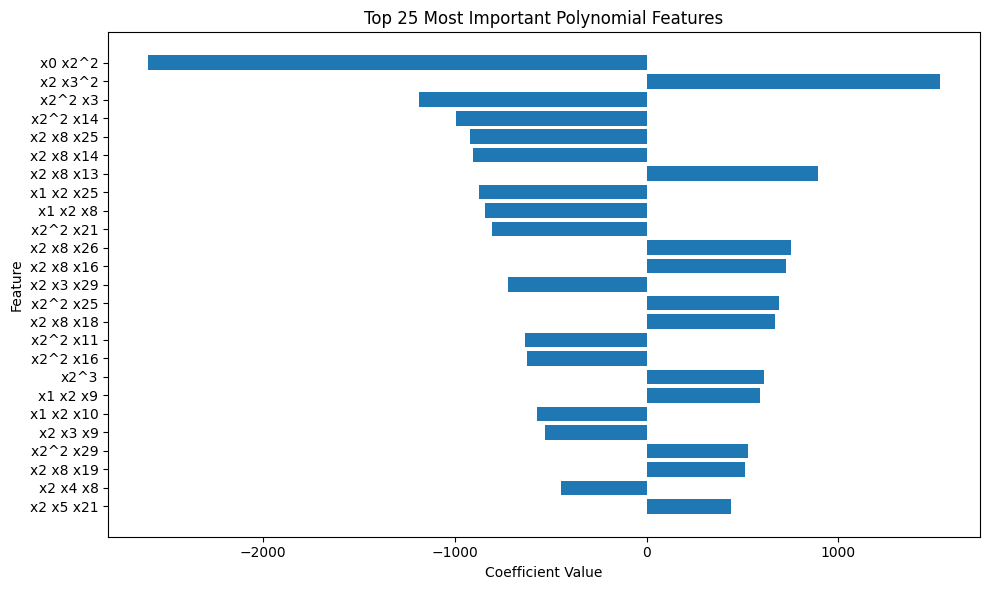

In [ ]:
exp52_B = experiment_52_B(DATASET_TRAIN, DATASET_TEST, "mse")

### 71-80

In [ ]:
exp71 = experiment_71(DATASET_TRAIN, DATASET_TEST, "mse")
exp72 = experiment_72(DATASET_TRAIN, DATASET_TEST, "mse")

Removed values outside 5th–95th percentiles (-432.166 to 19034.916).
Train shape: (4500, 20), Test shape: (500, 19)
<class 'pandas.core.frame.DataFrame'>
Index: 4500 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Supplier_Reliability     4500 non-null   float64
 1   Equipment_Height         4500 non-null   float64
 2   Equipment_Type           4500 non-null   object 
 3   Equipment_Value          4500 non-null   float64
 4   Base_Transport_Fee       4500 non-null   float64
 5   CrossBorder_Shipping     4500 non-null   object 
 6   Urgent_Shipping          4500 non-null   object 
 7   Installation_Service     4500 non-null   object 
 8   Transport_Method         4500 non-null   object 
 9   Fragile_Equipment        4500 non-null   object 
 10  Hospital_Info            4500 non-null   object 
 11  Rural_Hospital           4500 non-null   object 
 12  Transport_Cost       

Removed values outside 5th–95th percentiles (-432.166 to 19034.916).
Train shape: (4500, 20), Test shape: (500, 19)
<class 'pandas.core.frame.DataFrame'>
Index: 4500 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Supplier_Reliability     4500 non-null   float64
 1   Equipment_Height         4500 non-null   float64
 2   Equipment_Type           4500 non-null   object 
 3   Equipment_Value          4500 non-null   float64
 4   Base_Transport_Fee       4500 non-null   float64
 5   CrossBorder_Shipping     4500 non-null   object 
 6   Urgent_Shipping          4500 non-null   object 
 7   Installation_Service     4500 non-null   object 
 8   Transport_Method         4500 non-null   object 
 9   Fragile_Equipment        4500 non-null   object 
 10  Hospital_Info            4500 non-null   object 
 11  Rural_Hospital           4500 non-null   object 
 12  Transport_Cost       

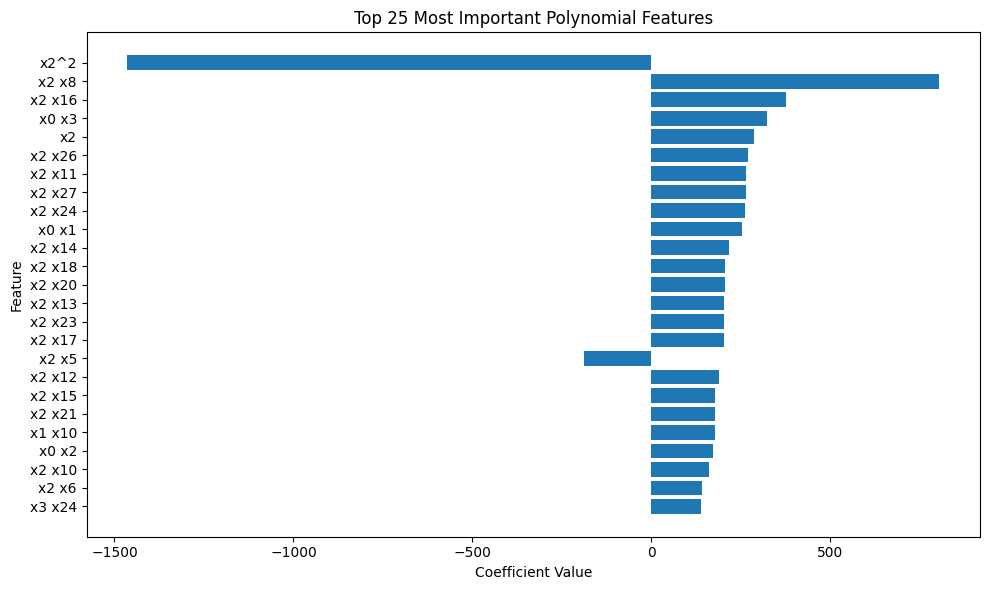

Removed values outside 5th–95th percentiles (-432.166 to 19034.916).
Train shape: (4500, 20), Test shape: (500, 19)
<class 'pandas.core.frame.DataFrame'>
Index: 4500 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Supplier_Reliability     4500 non-null   float64
 1   Equipment_Height         4500 non-null   float64
 2   Equipment_Type           4500 non-null   object 
 3   Equipment_Value          4500 non-null   float64
 4   Base_Transport_Fee       4500 non-null   float64
 5   CrossBorder_Shipping     4500 non-null   object 
 6   Urgent_Shipping          4500 non-null   object 
 7   Installation_Service     4500 non-null   object 
 8   Transport_Method         4500 non-null   object 
 9   Fragile_Equipment        4500 non-null   object 
 10  Hospital_Info            4500 non-null   object 
 11  Rural_Hospital           4500 non-null   object 
 12  Transport_Cost       

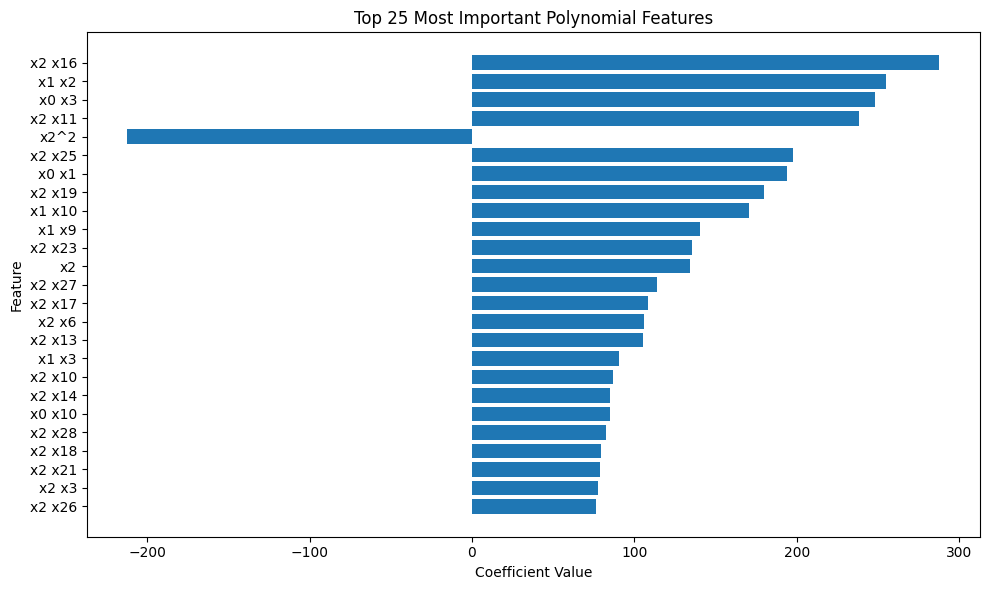

In [ ]:
exp73 = experiment_73(DATASET_TRAIN, DATASET_TEST, "mse")
exp74 = experiment_74(DATASET_TRAIN, DATASET_TEST, "mse")

Removed values outside 5th–95th percentiles (-432.166 to 19034.916).
Train shape: (4500, 20), Test shape: (500, 19)
<class 'pandas.core.frame.DataFrame'>
Index: 4500 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Supplier_Reliability     4500 non-null   float64
 1   Equipment_Height         4500 non-null   float64
 2   Equipment_Type           4500 non-null   object 
 3   Equipment_Value          4500 non-null   float64
 4   Base_Transport_Fee       4500 non-null   float64
 5   CrossBorder_Shipping     4500 non-null   object 
 6   Urgent_Shipping          4500 non-null   object 
 7   Installation_Service     4500 non-null   object 
 8   Transport_Method         4500 non-null   object 
 9   Fragile_Equipment        4500 non-null   object 
 10  Hospital_Info            4500 non-null   object 
 11  Rural_Hospital           4500 non-null   object 
 12  Transport_Cost       

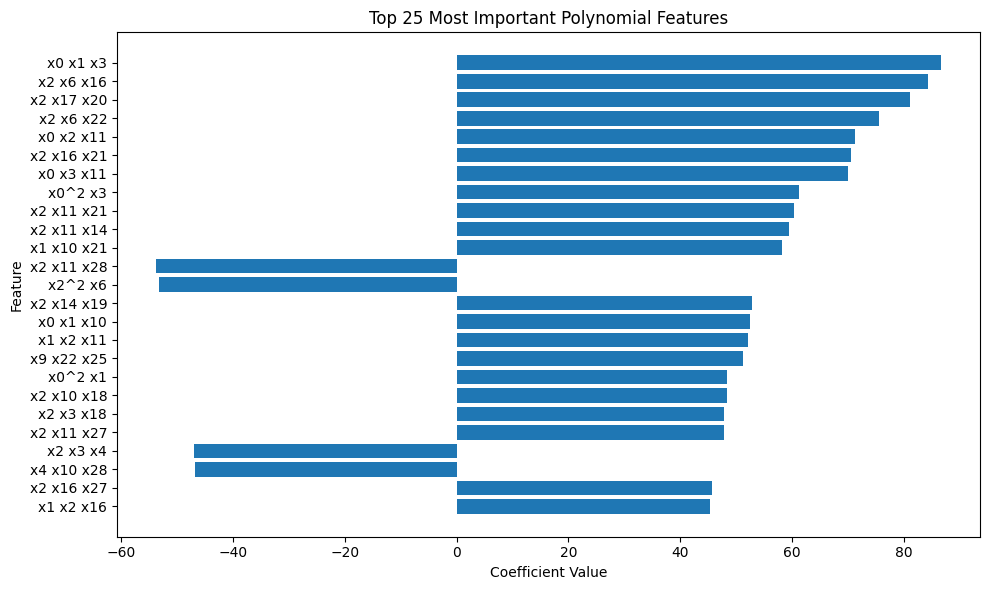

Removed values outside 2.5th–97.5th percentiles (-1313.716 to 55947.108).
Train shape: (4750, 20), Test shape: (500, 19)
<class 'pandas.core.frame.DataFrame'>
Index: 4750 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Supplier_Reliability     4750 non-null   float64
 1   Equipment_Height         4750 non-null   float64
 2   Equipment_Type           4750 non-null   object 
 3   Equipment_Value          4750 non-null   float64
 4   Base_Transport_Fee       4750 non-null   float64
 5   CrossBorder_Shipping     4750 non-null   object 
 6   Urgent_Shipping          4750 non-null   object 
 7   Installation_Service     4750 non-null   object 
 8   Transport_Method         4750 non-null   object 
 9   Fragile_Equipment        4750 non-null   object 
 10  Hospital_Info            4750 non-null   object 
 11  Rural_Hospital           4750 non-null   object 
 12  Transport_Cost  

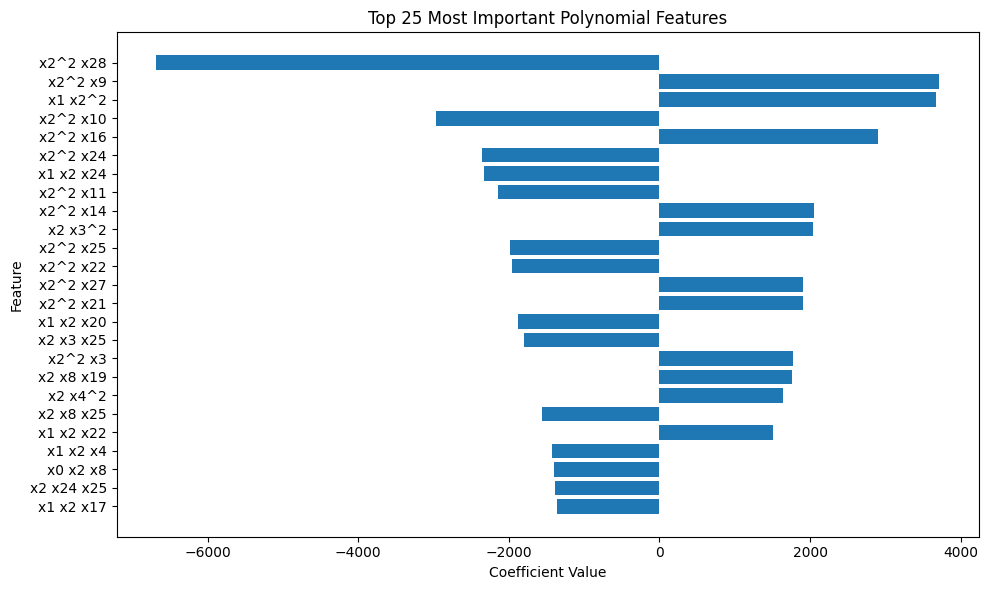

In [ ]:
exp75 = experiment_75(DATASET_TRAIN, DATASET_TEST, "mse")
exp76 = experiment_76(DATASET_TRAIN, DATASET_TEST, "mse")

In [ ]:
exp77 = experiment_77(DATASET_TRAIN, DATASET_TEST, "mse")
exp78 = experiment_78(DATASET_TRAIN, DATASET_TEST, "mse")

Removed values outside 2.5th–97.5th percentiles (-1313.716 to 55947.108).
Train shape: (4750, 20), Test shape: (500, 19)
<class 'pandas.core.frame.DataFrame'>
Index: 4750 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Supplier_Reliability     4750 non-null   float64
 1   Equipment_Height         4750 non-null   float64
 2   Equipment_Type           4750 non-null   object 
 3   Equipment_Value          4750 non-null   float64
 4   Base_Transport_Fee       4750 non-null   float64
 5   CrossBorder_Shipping     4750 non-null   object 
 6   Urgent_Shipping          4750 non-null   object 
 7   Installation_Service     4750 non-null   object 
 8   Transport_Method         4750 non-null   object 
 9   Fragile_Equipment        4750 non-null   object 
 10  Hospital_Info            4750 non-null   object 
 11  Rural_Hospital           4750 non-null   object 
 12  Transport_Cost  

Removed values outside 5th–95th percentiles (-432.166 to 19034.916).
Train shape: (4500, 20), Test shape: (500, 19)
<class 'pandas.core.frame.DataFrame'>
Index: 4500 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Supplier_Reliability     4500 non-null   float64
 1   Equipment_Height         4500 non-null   float64
 2   Equipment_Type           4500 non-null   object 
 3   Equipment_Value          4500 non-null   float64
 4   Base_Transport_Fee       4500 non-null   float64
 5   CrossBorder_Shipping     4500 non-null   object 
 6   Urgent_Shipping          4500 non-null   object 
 7   Installation_Service     4500 non-null   object 
 8   Transport_Method         4500 non-null   object 
 9   Fragile_Equipment        4500 non-null   object 
 10  Hospital_Info            4500 non-null   object 
 11  Rural_Hospital           4500 non-null   object 
 12  Transport_Cost       

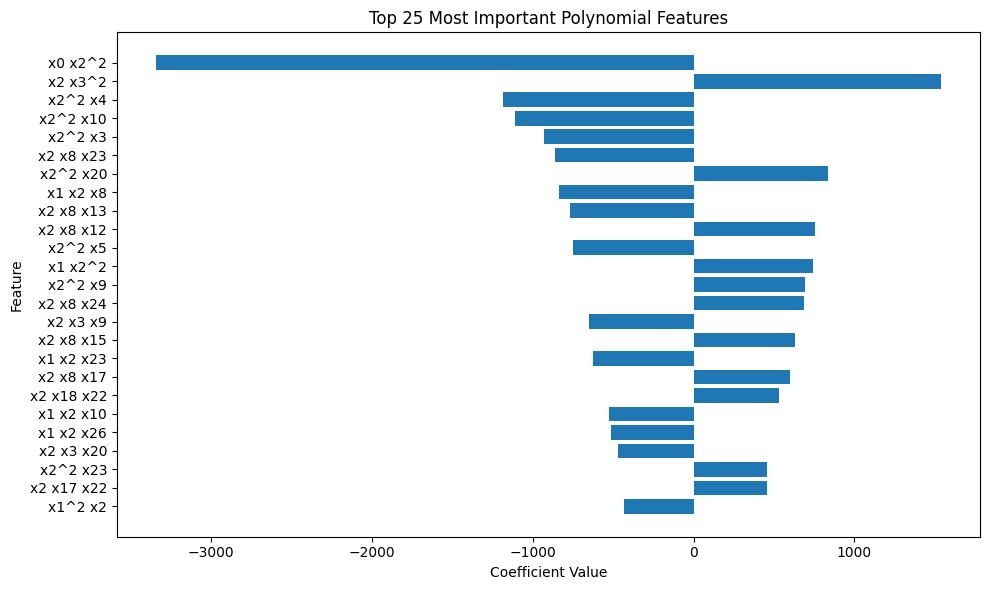

Removed values outside 5th–95th percentiles (-432.166 to 19034.916).
Train shape: (4500, 20), Test shape: (500, 19)
<class 'pandas.core.frame.DataFrame'>
Index: 4500 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Supplier_Reliability     4500 non-null   float64
 1   Equipment_Height         4500 non-null   float64
 2   Equipment_Type           4500 non-null   object 
 3   Equipment_Value          4500 non-null   float64
 4   Base_Transport_Fee       4500 non-null   float64
 5   CrossBorder_Shipping     4500 non-null   object 
 6   Urgent_Shipping          4500 non-null   object 
 7   Installation_Service     4500 non-null   object 
 8   Transport_Method         4500 non-null   object 
 9   Fragile_Equipment        4500 non-null   object 
 10  Hospital_Info            4500 non-null   object 
 11  Rural_Hospital           4500 non-null   object 
 12  Transport_Cost       

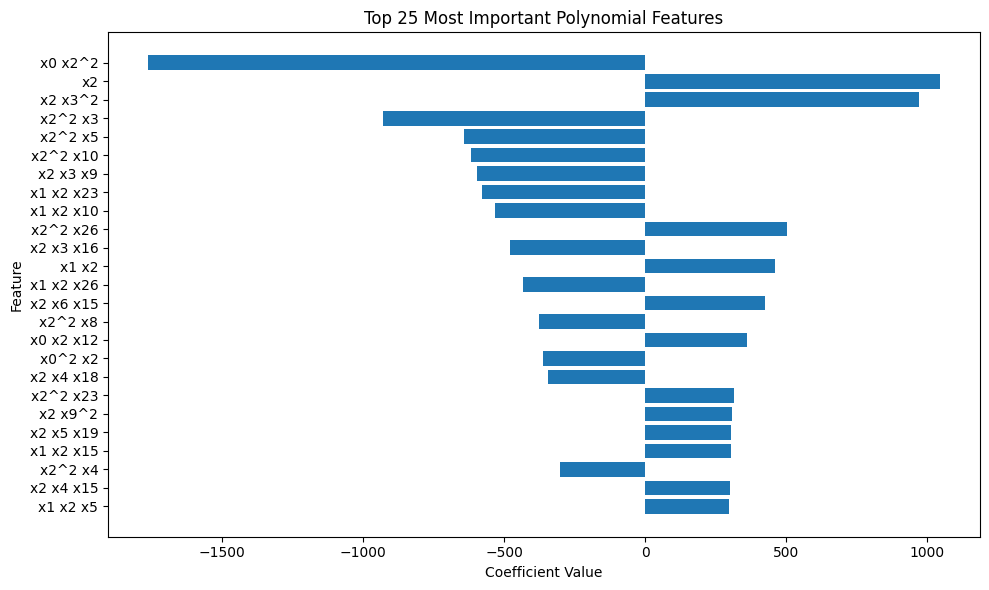

In [ ]:
exp79 = experiment_79(DATASET_TRAIN, DATASET_TEST, "mse")
exp80 = experiment_80(DATASET_TRAIN, DATASET_TEST, "mse")

In [ ]:
exp81 = experiment_81(DATASET_TRAIN, DATASET_TEST, "mse")

Removed values outside 2.5th–97.5th percentiles (-1313.716 to 55947.108).
Train shape: (4750, 20), Test shape: (500, 19)
<class 'pandas.core.frame.DataFrame'>
Index: 4750 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Supplier_Reliability     4750 non-null   float64
 1   Equipment_Height         4750 non-null   float64
 2   Equipment_Type           4750 non-null   object 
 3   Equipment_Value          4750 non-null   float64
 4   Base_Transport_Fee       4750 non-null   float64
 5   CrossBorder_Shipping     4750 non-null   object 
 6   Urgent_Shipping          4750 non-null   object 
 7   Installation_Service     4750 non-null   object 
 8   Transport_Method         4750 non-null   object 
 9   Fragile_Equipment        4750 non-null   object 
 10  Hospital_Info            4750 non-null   object 
 11  Rural_Hospital           4750 non-null   object 
 12  Transport_Cost  

In [ ]:
exp83 = experiment_83(DATASET_TRAIN, DATASET_TEST, "mse")
exp84 = experiment_84(DATASET_TRAIN, DATASET_TEST, "mse")

Removed values outside 2.5th–97.5th percentiles (-1313.716 to 55947.108).
Train shape: (4750, 20), Test shape: (500, 19)
<class 'pandas.core.frame.DataFrame'>
Index: 4750 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Supplier_Reliability     4750 non-null   float64
 1   Equipment_Height         4750 non-null   float64
 2   Equipment_Type           4750 non-null   object 
 3   Equipment_Value          4750 non-null   float64
 4   Base_Transport_Fee       4750 non-null   float64
 5   CrossBorder_Shipping     4750 non-null   object 
 6   Urgent_Shipping          4750 non-null   object 
 7   Installation_Service     4750 non-null   object 
 8   Transport_Method         4750 non-null   object 
 9   Fragile_Equipment        4750 non-null   object 
 10  Hospital_Info            4750 non-null   object 
 11  Rural_Hospital           4750 non-null   object 
 12  Transport_Cost  

In [ ]:
exp85 = experiment_85(DATASET_TRAIN, DATASET_TEST, "mse")
exp86 = experiment_86(DATASET_TRAIN, DATASET_TEST, "mse")

Removed values outside 5th–95th percentiles (-432.166 to 19034.916).
Train shape: (4500, 20), Test shape: (500, 19)


KeyboardInterrupt: 

In [ ]:
exp87 = experiment_87(DATASET_TRAIN, DATASET_TEST, "mse")

Removed values outside 5th–95th percentiles (-432.166 to 19034.916).
Train shape: (4500, 20), Test shape: (500, 19)
<class 'pandas.core.frame.DataFrame'>
Index: 4500 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Supplier_Reliability     4500 non-null   float64
 1   Equipment_Height         4500 non-null   float64
 2   Equipment_Type           4500 non-null   object 
 3   Equipment_Value          4500 non-null   float64
 4   Base_Transport_Fee       4500 non-null   float64
 5   CrossBorder_Shipping     4500 non-null   object 
 6   Urgent_Shipping          4500 non-null   object 
 7   Installation_Service     4500 non-null   object 
 8   Transport_Method         4500 non-null   object 
 9   Fragile_Equipment        4500 non-null   object 
 10  Hospital_Info            4500 non-null   object 
 11  Rural_Hospital           4500 non-null   object 
 12  Transport_Cost       

In [ ]:
epx88 = experiment_88(DATASET_TRAIN, DATASET_TEST, "mse")

Removed values outside 5th–95th percentiles (-432.166 to 19034.916).
Train shape: (4500, 20), Test shape: (500, 19)
<class 'pandas.core.frame.DataFrame'>
Index: 4500 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Supplier_Reliability     4500 non-null   float64
 1   Equipment_Height         4500 non-null   float64
 2   Equipment_Type           4500 non-null   object 
 3   Equipment_Value          4500 non-null   float64
 4   Base_Transport_Fee       4500 non-null   float64
 5   CrossBorder_Shipping     4500 non-null   object 
 6   Urgent_Shipping          4500 non-null   object 
 7   Installation_Service     4500 non-null   object 
 8   Transport_Method         4500 non-null   object 
 9   Fragile_Equipment        4500 non-null   object 
 10  Hospital_Info            4500 non-null   object 
 11  Rural_Hospital           4500 non-null   object 
 12  Transport_Cost       

In [ ]:
# def nd_train():
#     train_df = pd.read_csv('train.csv',)
#     train_df.shape
#     X = train_df.drop('Transport_Cost', axis=1)

#     y = train_df['Transport_Cost']
#     def clean_data(train_df):
#         # fix equipment type
#         # group by supplier name and fill na with mode of equipment type for that supplier
#         train_df['Equipment_Type'] = train_df.groupby('Supplier_Name')['Equipment_Type'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else 'Unknown'))
#         train_df.isna().sum()
#         #remove all rows where Equipment_Type is still na or unknown
#         train_df = train_df[train_df['Equipment_Type'].notna() & (train_df['Equipment_Type'] != 'Unknown')]
#         train_df.isna().sum()
#         for col in ['Equipment_Height', 'Equipment_Width', 'Equipment_Weight']:
#             train_df[col] = (
#                 train_df.groupby("Equipment_Type")[col]
#                     .transform(lambda x: x.fillna(x.mean()))
#             )
#             train_df[col] = train_df[col].fillna(train_df[col].mean())
#         train_df.isna().sum()
#         train_df.dropna(inplace=True)
#         train_df.isna().sum()

In [ ]:
### 89-97 (This was lost, due to losing revision history/ no autosaving)

### 98-100

In [ ]:
exp97 = experiment_97(DATASET_TRAIN, DATASET_TEST, "mse")

Removed values outside 9th–95th percentiles (-157.555 to 19034.916).
Train shape: (4300, 14), Test shape: (500, 13)
<class 'pandas.core.frame.DataFrame'>
Index: 4300 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Supplier_Reliability  4300 non-null   float64
 1   Equipment_Height      4300 non-null   float64
 2   Equipment_Type        4300 non-null   object 
 3   Equipment_Value       4300 non-null   float64
 4   Base_Transport_Fee    4300 non-null   float64
 5   CrossBorder_Shipping  4300 non-null   object 
 6   Urgent_Shipping       4300 non-null   object 
 7   Installation_Service  4300 non-null   object 
 8   Transport_Method      4300 non-null   object 
 9   Fragile_Equipment     4300 non-null   object 
 10  Hospital_Info         4300 non-null   object 
 11  Rural_Hospital        4300 non-null   object 
 12  Transport_Cost        4300 non-null   float64
 13  Transport_Du

In [ ]:
exp99 = experiment_99(DATASET_TRAIN, DATASET_TEST, "mse")
exp98 = experiment_98(DATASET_TRAIN, DATASET_TEST, "mse")
exp100 = experiment_100(DATASET_TRAIN, DATASET_TEST, "mse")

Removed values outside 5th–95th percentiles (-432.166 to 19034.916).
Train shape: (4500, 14), Test shape: (500, 13)
<class 'pandas.core.frame.DataFrame'>
Index: 4500 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Supplier_Reliability  4500 non-null   float64
 1   Equipment_Height      4500 non-null   float64
 2   Equipment_Type        4500 non-null   object 
 3   Equipment_Value       4500 non-null   float64
 4   Base_Transport_Fee    4500 non-null   float64
 5   CrossBorder_Shipping  4500 non-null   object 
 6   Urgent_Shipping       4500 non-null   object 
 7   Installation_Service  4500 non-null   object 
 8   Transport_Method      4500 non-null   object 
 9   Fragile_Equipment     4500 non-null   object 
 10  Hospital_Info         4500 non-null   object 
 11  Rural_Hospital        4500 non-null   object 
 12  Transport_Cost        4500 non-null   float64
 13  Transport_Du

In [ ]:
exp101 = experiment_101(DATASET_TRAIN, DATASET_TEST, "mse")

Removed values outside 5th–95th percentiles (-432.166 to 19034.916).
Train shape: (4500, 14), Test shape: (500, 13)
<class 'pandas.core.frame.DataFrame'>
Index: 4500 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Supplier_Reliability  4500 non-null   float64
 1   Equipment_Height      4500 non-null   float64
 2   Equipment_Type        4500 non-null   object 
 3   Equipment_Value       4500 non-null   float64
 4   Base_Transport_Fee    4500 non-null   float64
 5   CrossBorder_Shipping  4500 non-null   object 
 6   Urgent_Shipping       4500 non-null   object 
 7   Installation_Service  4500 non-null   object 
 8   Transport_Method      4500 non-null   object 
 9   Fragile_Equipment     4500 non-null   object 
 10  Hospital_Info         4500 non-null   object 
 11  Rural_Hospital        4500 non-null   object 
 12  Transport_Cost        4500 non-null   float64
 13  Transport_Du

In [ ]:
exp102 = experiment_102(DATASET_TRAIN, DATASET_TEST, "mse")
exp103 = experiment_103(DATASET_TRAIN, DATASET_TEST, "mse")

Removed values outside 5th–95th percentiles (-432.166 to 19034.916).
Train shape: (4500, 20), Test shape: (500, 19)
<class 'pandas.core.frame.DataFrame'>
Index: 4500 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Supplier_Reliability     4500 non-null   float64
 1   Equipment_Height         4500 non-null   float64
 2   Equipment_Type           4500 non-null   object 
 3   Equipment_Value          4500 non-null   float64
 4   Base_Transport_Fee       4500 non-null   float64
 5   CrossBorder_Shipping     4500 non-null   object 
 6   Urgent_Shipping          4500 non-null   object 
 7   Installation_Service     4500 non-null   object 
 8   Transport_Method         4500 non-null   object 
 9   Fragile_Equipment        4500 non-null   object 
 10  Hospital_Info            4500 non-null   object 
 11  Rural_Hospital           4500 non-null   object 
 12  Transport_Cost       

In [ ]:
exp104 = experiment_104(DATASET_TRAIN, DATASET_TEST, "mse")

Removed values outside 2th–98th percentiles (-1978.137 to 88590.300).
Train shape: (4800, 20), Test shape: (500, 19)
<class 'pandas.core.frame.DataFrame'>
Index: 4800 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Supplier_Reliability     4800 non-null   float64
 1   Equipment_Height         4800 non-null   float64
 2   Equipment_Type           4800 non-null   object 
 3   Equipment_Value          4800 non-null   float64
 4   Base_Transport_Fee       4800 non-null   float64
 5   CrossBorder_Shipping     4800 non-null   object 
 6   Urgent_Shipping          4800 non-null   object 
 7   Installation_Service     4800 non-null   object 
 8   Transport_Method         4800 non-null   object 
 9   Fragile_Equipment        4800 non-null   object 
 10  Hospital_Info            4800 non-null   object 
 11  Rural_Hospital           4800 non-null   object 
 12  Transport_Cost      

In [ ]:
exp105 = experiment_105(DATASET_TRAIN, DATASET_TEST, "mse")
exp106 = experiment_106(DATASET_TRAIN, DATASET_TEST, "mse")

Removed values outside 2th–98th percentiles (-1978.137 to 88590.300).
Train shape: (4800, 20), Test shape: (500, 19)
<class 'pandas.core.frame.DataFrame'>
Index: 4800 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Supplier_Reliability     4800 non-null   float64
 1   Equipment_Height         4800 non-null   float64
 2   Equipment_Type           4800 non-null   object 
 3   Equipment_Value          4800 non-null   float64
 4   Base_Transport_Fee       4800 non-null   float64
 5   CrossBorder_Shipping     4800 non-null   object 
 6   Urgent_Shipping          4800 non-null   object 
 7   Installation_Service     4800 non-null   object 
 8   Transport_Method         4800 non-null   object 
 9   Fragile_Equipment        4800 non-null   object 
 10  Hospital_Info            4800 non-null   object 
 11  Rural_Hospital           4800 non-null   object 
 12  Transport_Cost      

In [ ]:
exp107 = experiment_107(DATASET_TRAIN, DATASET_TEST, "mse")

Removed values outside 2th–98th percentiles (-1978.137 to 88590.300).
Train shape: (4800, 20), Test shape: (500, 19)
<class 'pandas.core.frame.DataFrame'>
Index: 4800 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Supplier_Reliability     4800 non-null   float64
 1   Equipment_Height         4800 non-null   float64
 2   Equipment_Type           4800 non-null   object 
 3   Equipment_Value          4800 non-null   float64
 4   Base_Transport_Fee       4800 non-null   float64
 5   CrossBorder_Shipping     4800 non-null   object 
 6   Urgent_Shipping          4800 non-null   object 
 7   Installation_Service     4800 non-null   object 
 8   Transport_Method         4800 non-null   object 
 9   Fragile_Equipment        4800 non-null   object 
 10  Hospital_Info            4800 non-null   object 
 11  Rural_Hospital           4800 non-null   object 
 12  Transport_Cost      

In [ ]:
exp108 = experiment_108(DATASET_TRAIN, DATASET_TEST, "mse")
exp109 = experiment_109(DATASET_TRAIN, DATASET_TEST, "mse")

Removed values outside 2th–98th percentiles (-1978.137 to 88590.300).
Train shape: (4800, 20), Test shape: (500, 19)
<class 'pandas.core.frame.DataFrame'>
Index: 4800 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Supplier_Reliability     4800 non-null   float64
 1   Equipment_Height         4800 non-null   float64
 2   Equipment_Type           4800 non-null   object 
 3   Equipment_Value          4800 non-null   float64
 4   Base_Transport_Fee       4800 non-null   float64
 5   CrossBorder_Shipping     4800 non-null   object 
 6   Urgent_Shipping          4800 non-null   object 
 7   Installation_Service     4800 non-null   object 
 8   Transport_Method         4800 non-null   object 
 9   Fragile_Equipment        4800 non-null   object 
 10  Hospital_Info            4800 non-null   object 
 11  Rural_Hospital           4800 non-null   object 
 12  Transport_Cost      

In [ ]:
exp110 = experiment_110(DATASET_TRAIN, DATASET_TEST, "mse")
exp111 = experiment_111(DATASET_TRAIN, DATASET_TEST, "mse")

Removed values outside 2th–98th percentiles (-1978.137 to 88590.300).
Train shape: (4800, 20), Test shape: (500, 19)
<class 'pandas.core.frame.DataFrame'>
Index: 4800 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Supplier_Reliability     4800 non-null   float64
 1   Equipment_Height         4800 non-null   float64
 2   Equipment_Type           4800 non-null   object 
 3   Equipment_Value          4800 non-null   float64
 4   Base_Transport_Fee       4800 non-null   float64
 5   CrossBorder_Shipping     4800 non-null   object 
 6   Urgent_Shipping          4800 non-null   object 
 7   Installation_Service     4800 non-null   object 
 8   Transport_Method         4800 non-null   object 
 9   Fragile_Equipment        4800 non-null   object 
 10  Hospital_Info            4800 non-null   object 
 11  Rural_Hospital           4800 non-null   object 
 12  Transport_Cost      

In [ ]:
exp112 = experiment_112(DATASET_TRAIN, DATASET_TEST, "mse")
exp113 = experiment_113(DATASET_TRAIN, DATASET_TEST, "mse")

Removed values outside 2th–98th percentiles (-1978.137 to 88590.300).
Train shape: (4800, 22), Test shape: (500, 21)
<class 'pandas.core.frame.DataFrame'>
Index: 4800 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Supplier_Reliability     4800 non-null   float64
 1   Equipment_Height         4800 non-null   float64
 2   Equipment_Width          4800 non-null   float64
 3   Equipment_Weight         4800 non-null   float64
 4   Equipment_Type           4800 non-null   object 
 5   Equipment_Value          4800 non-null   float64
 6   Base_Transport_Fee       4800 non-null   float64
 7   CrossBorder_Shipping     4800 non-null   object 
 8   Urgent_Shipping          4800 non-null   object 
 9   Installation_Service     4800 non-null   object 
 10  Transport_Method         4800 non-null   object 
 11  Fragile_Equipment        4800 non-null   object 
 12  Hospital_Info       

In [ ]:
exp114 = experiment_114(DATASET_TRAIN, DATASET_TEST, "mse")

Removed values outside 2th–98th percentiles (-1978.137 to 88590.300).
Train shape: (4800, 14), Test shape: (500, 13)
<class 'pandas.core.frame.DataFrame'>
Index: 4800 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Supplier_Reliability  4800 non-null   float64
 1   Equipment_Height      4800 non-null   float64
 2   Equipment_Type        4800 non-null   object 
 3   Equipment_Value       4800 non-null   float64
 4   Base_Transport_Fee    4800 non-null   float64
 5   CrossBorder_Shipping  4800 non-null   object 
 6   Urgent_Shipping       4800 non-null   object 
 7   Installation_Service  4800 non-null   object 
 8   Transport_Method      4800 non-null   object 
 9   Fragile_Equipment     4800 non-null   object 
 10  Hospital_Info         4800 non-null   object 
 11  Rural_Hospital        4800 non-null   object 
 12  Transport_Cost        4800 non-null   float64
 13  Transport_D

In [ ]:
exp115 = experiment_115(DATASET_TRAIN, DATASET_TEST, "mse")

Removed values outside 10th–95th percentiles (97.424 to 19034.916).
Train shape: (4250, 20), Test shape: (500, 19)
<class 'pandas.core.frame.DataFrame'>
Index: 4250 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Supplier_Reliability     4250 non-null   float64
 1   Equipment_Height         4250 non-null   float64
 2   Equipment_Type           4250 non-null   object 
 3   Equipment_Value          4250 non-null   float64
 4   Base_Transport_Fee       4250 non-null   float64
 5   CrossBorder_Shipping     4250 non-null   object 
 6   Urgent_Shipping          4250 non-null   object 
 7   Installation_Service     4250 non-null   object 
 8   Transport_Method         4250 non-null   object 
 9   Fragile_Equipment        4250 non-null   object 
 10  Hospital_Info            4250 non-null   object 
 11  Rural_Hospital           4250 non-null   object 
 12  Transport_Cost        

In [ ]:
exp116 = experiment_116(DATASET_TRAIN, DATASET_TEST, "mse")

Removed values outside 10th–95th percentiles (97.424 to 19034.916).
Train shape: (4250, 20), Test shape: (500, 19)
<class 'pandas.core.frame.DataFrame'>
Index: 4250 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Supplier_Reliability     4250 non-null   float64
 1   Equipment_Height         4250 non-null   float64
 2   Equipment_Type           4250 non-null   object 
 3   Equipment_Value          4250 non-null   float64
 4   Base_Transport_Fee       4250 non-null   float64
 5   CrossBorder_Shipping     4250 non-null   object 
 6   Urgent_Shipping          4250 non-null   object 
 7   Installation_Service     4250 non-null   object 
 8   Transport_Method         4250 non-null   object 
 9   Fragile_Equipment        4250 non-null   object 
 10  Hospital_Info            4250 non-null   object 
 11  Rural_Hospital           4250 non-null   object 
 12  Transport_Cost        

In [ ]:
exp117 = experiment_117(DATASET_TRAIN, DATASET_TEST, "mse")

Removed values outside 10th–95th percentiles (97.424 to 19034.916).
Train shape: (4250, 20), Test shape: (500, 19)
<class 'pandas.core.frame.DataFrame'>
Index: 4250 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Supplier_Reliability     4250 non-null   float64
 1   Equipment_Height         4250 non-null   float64
 2   Equipment_Type           4250 non-null   object 
 3   Equipment_Value          4250 non-null   float64
 4   Base_Transport_Fee       4250 non-null   float64
 5   CrossBorder_Shipping     4250 non-null   object 
 6   Urgent_Shipping          4250 non-null   object 
 7   Installation_Service     4250 non-null   object 
 8   Transport_Method         4250 non-null   object 
 9   Fragile_Equipment        4250 non-null   object 
 10  Hospital_Info            4250 non-null   object 
 11  Rural_Hospital           4250 non-null   object 
 12  Transport_Cost        

In [ ]:
exp118 = experiment_118(DATASET_TRAIN, DATASET_TEST, "mse")

Removed values outside 10th–95th percentiles (97.424 to 19034.916).
Train shape: (4250, 20), Test shape: (500, 19)
<class 'pandas.core.frame.DataFrame'>
Index: 4250 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Supplier_Reliability     4250 non-null   float64
 1   Equipment_Height         4250 non-null   float64
 2   Equipment_Type           4250 non-null   object 
 3   Equipment_Value          4250 non-null   float64
 4   Base_Transport_Fee       4250 non-null   float64
 5   CrossBorder_Shipping     4250 non-null   object 
 6   Urgent_Shipping          4250 non-null   object 
 7   Installation_Service     4250 non-null   object 
 8   Transport_Method         4250 non-null   object 
 9   Fragile_Equipment        4250 non-null   object 
 10  Hospital_Info            4250 non-null   object 
 11  Rural_Hospital           4250 non-null   object 
 12  Transport_Cost        

In [ ]:
exp119 = experiment_119(DATASET_TRAIN, DATASET_TEST, "mse")

Removed values outside 10th–95th percentiles (97.424 to 19034.916).
Train shape: (4250, 20), Test shape: (500, 19)
<class 'pandas.core.frame.DataFrame'>
Index: 4250 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Supplier_Reliability     4250 non-null   float64
 1   Equipment_Height         4250 non-null   float64
 2   Equipment_Type           4250 non-null   object 
 3   Equipment_Value          4250 non-null   float64
 4   Base_Transport_Fee       4250 non-null   float64
 5   CrossBorder_Shipping     4250 non-null   object 
 6   Urgent_Shipping          4250 non-null   object 
 7   Installation_Service     4250 non-null   object 
 8   Transport_Method         4250 non-null   object 
 9   Fragile_Equipment        4250 non-null   object 
 10  Hospital_Info            4250 non-null   object 
 11  Rural_Hospital           4250 non-null   object 
 12  Transport_Cost        

In [ ]:
exp120 = experiment_120(DATASET_TRAIN, DATASET_TEST, "mse")
exp121 = experiment_121(DATASET_TRAIN, DATASET_TEST, "mse")
exp122 = experiment_122(DATASET_TRAIN, DATASET_TEST, "mse")

Removed values outside 5th–95th percentiles (-432.166 to 19034.916).
Train shape: (4500, 14), Test shape: (500, 13)
<class 'pandas.core.frame.DataFrame'>
Index: 4500 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Supplier_Reliability  4500 non-null   float64
 1   Equipment_Height      4500 non-null   float64
 2   Equipment_Type        4500 non-null   object 
 3   Equipment_Value       4500 non-null   float64
 4   Base_Transport_Fee    4500 non-null   float64
 5   CrossBorder_Shipping  4500 non-null   object 
 6   Urgent_Shipping       4500 non-null   object 
 7   Installation_Service  4500 non-null   object 
 8   Transport_Method      4500 non-null   object 
 9   Fragile_Equipment     4500 non-null   object 
 10  Hospital_Info         4500 non-null   object 
 11  Rural_Hospital        4500 non-null   object 
 12  Transport_Cost        4500 non-null   float64
 13  Transport_Du

In [ ]:
exp124 = experiment_124(DATASET_TRAIN, DATASET_TEST, "mse")
exp125 = experiment_125(DATASET_TRAIN, DATASET_TEST, "mse")
exp126 = experiment_126(DATASET_TRAIN, DATASET_TEST, "mse")

Removed values outside 5th–95th percentiles (-432.166 to 19034.916).
Train shape: (4500, 14), Test shape: (500, 13)
<class 'pandas.core.frame.DataFrame'>
Index: 4500 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Supplier_Reliability  4500 non-null   float64
 1   Equipment_Height      4500 non-null   float64
 2   Equipment_Type        4500 non-null   object 
 3   Equipment_Value       4500 non-null   float64
 4   Base_Transport_Fee    4500 non-null   float64
 5   CrossBorder_Shipping  4500 non-null   object 
 6   Urgent_Shipping       4500 non-null   object 
 7   Installation_Service  4500 non-null   object 
 8   Transport_Method      4500 non-null   object 
 9   Fragile_Equipment     4500 non-null   object 
 10  Hospital_Info         4500 non-null   object 
 11  Rural_Hospital        4500 non-null   object 
 12  Transport_Cost        4500 non-null   float64
 13  Transport_Du

In [ ]:
exp127 = experiment_127(DATASET_TRAIN, DATASET_TEST, "mse")

Removed values outside 5th–95th percentiles (-432.166 to 19034.916).
Train shape: (4500, 14), Test shape: (500, 13)
<class 'pandas.core.frame.DataFrame'>
Index: 4500 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Supplier_Reliability  4500 non-null   float64
 1   Equipment_Height      4500 non-null   float64
 2   Equipment_Type        4500 non-null   object 
 3   Equipment_Value       4500 non-null   float64
 4   Base_Transport_Fee    4500 non-null   float64
 5   CrossBorder_Shipping  4500 non-null   object 
 6   Urgent_Shipping       4500 non-null   object 
 7   Installation_Service  4500 non-null   object 
 8   Transport_Method      4500 non-null   object 
 9   Fragile_Equipment     4500 non-null   object 
 10  Hospital_Info         4500 non-null   object 
 11  Rural_Hospital        4500 non-null   object 
 12  Transport_Cost        4500 non-null   float64
 13  Transport_Du